### Import Libraries

In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import missingno as msno

In [4]:
path = os.path.join(os.getcwd(), 'stroke_data.csv')
path

'E:\\PycharmProjects\\Practice Python\\KN\\Stroke Prediction\\stroke_data.csv'

In [5]:
df = pd.read_csv('stroke_data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Creating a dataframe with the information of the attributes for better understanding
pd.set_option('max_colwidth',150)
pd.DataFrame({
    'Variable': df.columns.tolist(),
    'Description' :[
                    'Unique Identifier for each Patient',
                    'Gender of Pateint',
                    'Age of the patient',
                    '0: No Hypertension /  1: Hypertension',
                    '0: Has No Heart Disease /  1: Has Heart Disease',
                    'Marital Status: No / Yes',
                    'Type of Empoyement',
                    'Area type of Residence',
                    'Average Glucose Level in Blood',
                    'Body Mass Index',
                    "Patient's Smoking Status (Uknown: Means that information is not available)",
                    '0: No Stroke / 1: Stroke'
                   ]                  
})

,Variable,Description
0,id,Unique Identifier for each Patient
1,gender,Gender of Pateint
2,age,Age of the patient
3,hypertension,0: No Hypertension / 1: Hypertension
4,heart_disease,0: Has No Heart Disease / 1: Has Heart Disease
5,ever_married,Marital Status: No / Yes
6,work_type,Type of Empoyement
7,Residence_type,Area type of Residence
8,avg_glucose_level,Average Glucose Level in Blood
9,bmi,Body Mass Index


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
#Since the ID column is only the unique identifier for each patient and does not provide any meaningful information 
#for predicting whether the patient will have stroke or not we will remove the column
df.drop(['id'], axis=1,inplace=True)

In [9]:
df.select_dtypes(['int64']).head()

,hypertension,heart_disease,stroke
0,0,1,1
1,0,0,1
2,0,1,1
3,0,0,1
4,1,0,1


In [10]:
df.select_dtypes(['float64']).head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0


In [11]:
df.select_dtypes(['object']).head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [12]:
cat_features = df.select_dtypes(['object']).columns.tolist()
discrete_num_features = df.select_dtypes(['int64']).columns.tolist()
continuos_num_features = df.select_dtypes(['float64']).columns.tolist()

In [13]:
print(f'Categorical Featuers: {cat_features}')
print(f'Discrete Numerical Features: {discrete_num_features}')
print(f'Continuos Numerical Features: {continuos_num_features}')

Categorical Featuers: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Discrete Numerical Features: ['hypertension', 'heart_disease', 'stroke']
Continuos Numerical Features: ['age', 'avg_glucose_level', 'bmi']


In [14]:
# Checking the descriptive statistics for numerical column
df[discrete_num_features+continuos_num_features].describe()

,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000
mean,0.097456,0.054012,0.048728,43.226614,106.147677,28.893237
std,0.296607,0.226063,0.215320,22.612647,45.283560,7.854067
min,0.000000,0.000000,0.000000,0.080000,55.120000,10.300000
25%,0.000000,0.000000,0.000000,25.000000,77.245000,23.500000
50%,0.000000,0.000000,0.000000,45.000000,91.885000,28.100000
75%,0.000000,0.000000,0.000000,61.000000,114.090000,33.100000
max,1.000000,1.000000,1.000000,82.000000,271.740000,97.600000


In [15]:
# Checking the descriptive statistics for categorical column
df[cat_features].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


## Exploratory Data Analysis

### Visualizing the Distribution of the Target `stroke` variable

In [17]:
# sns.set_style('whitegrid')
# plt.figure(figsize=(12,8))
# total = float(len(df))
# ax = sns.countplot(x='stroke',data=df)
# plt.title('Countplot of "stroke"')
# for p in ax.patches:
#     percentage = '{:.1f}%'.format(100 * p.get_height()/total)
#     x = p.get_x() + p.get_width()/2
#     y = p.get_height()+20
#     ax.annotate(percentage, (x, y),ha='center', fontsize=20)
#     ax.set_xticklabels(['No Stroke','Stroke'])
# plt.show()  

Text(0.5, 1.0, "Pie Chart for 'stroke' distribution")

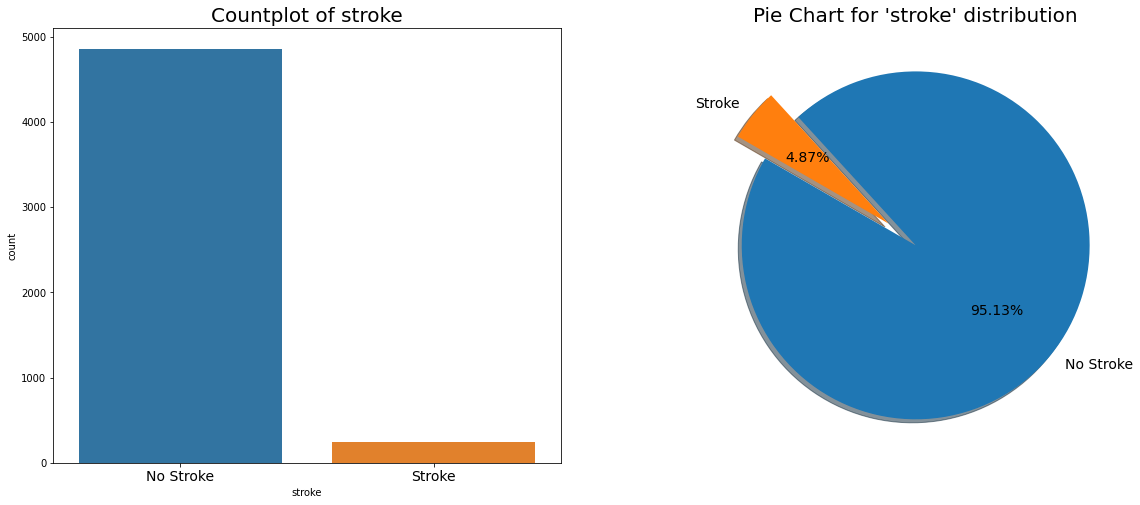

In [18]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x="stroke", data= df, palette="tab10",ax=ax[0])
ax[0].set_title('Countplot of stroke',fontsize=20)
ax[0].set_xticklabels(['No Stroke','Stroke'], fontsize=14)

#Pie Chart of type of gender
type_counts = df.stroke.value_counts()
ax[1].pie(type_counts, labels=['No Stroke','Stroke'],startangle=150, autopct="%1.2f%%", shadow=True,
        explode=(0,0.2),
        colors = sns.color_palette('tab10'),textprops={'fontsize':14})
plt.title("Pie Chart for 'stroke' distribution", fontsize=20)

From the above countplot, it is clear that the given dataset is an imbalanced dataset, since only about 5% of the target variable are of stroke and the rest of the 95% examples are of No stroke.

## Univariate Analysis

In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [20]:
print(f'Categorical Featuers: {cat_features}')
print(f'Discrete Numerical Features: {discrete_num_features}')
print(f'Continuos Numerical Features: {continuos_num_features}')

Categorical Featuers: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Discrete Numerical Features: ['hypertension', 'heart_disease', 'stroke']
Continuos Numerical Features: ['age', 'avg_glucose_level', 'bmi']


### Distribution of Gender

Text(0.5, 1.0, 'Pie Chart for gender distribution')

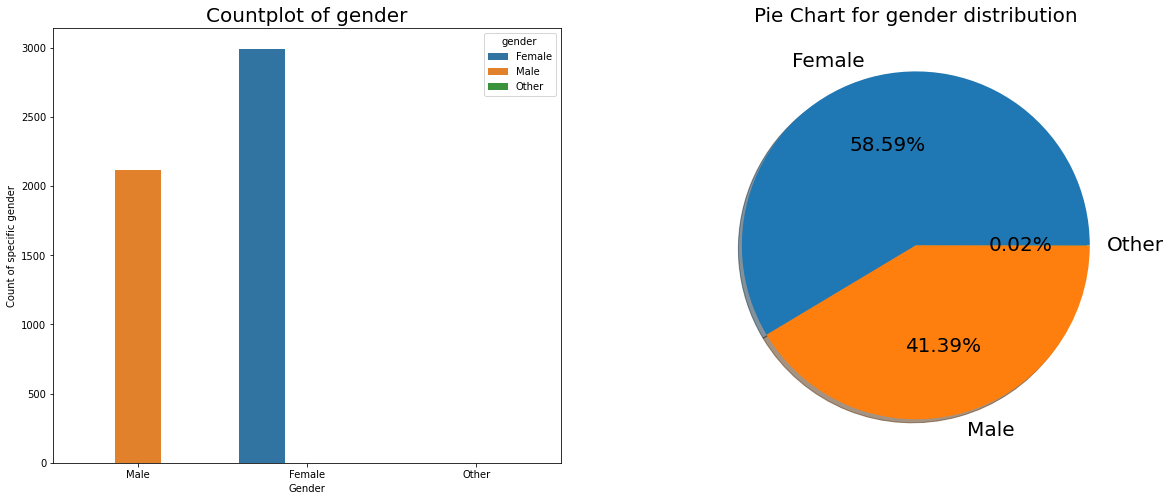

In [21]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x="gender", data= df, palette="tab10", hue = "gender", ax=ax[0],hue_order=['Female','Male','Other'])
ax[0].set(xlabel="Gender", ylabel="Count of specific gender")
ax[0].set_title('Countplot of gender',fontsize=20)
#Pie Chart of type of gender
type_counts = df.gender.value_counts()
plt.pie(type_counts, labels = type_counts.index, startangle=0, autopct="%1.2f%%", shadow=True,
        explode=None,
        colors = sns.color_palette('tab10'),textprops={'fontsize':20})
plt.title("Pie Chart for gender distribution", fontsize=20)

In [22]:
df.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

### Distribution of Hypertension

Text(0.5, 1.0, 'Pie Chart for hypertension distribution')

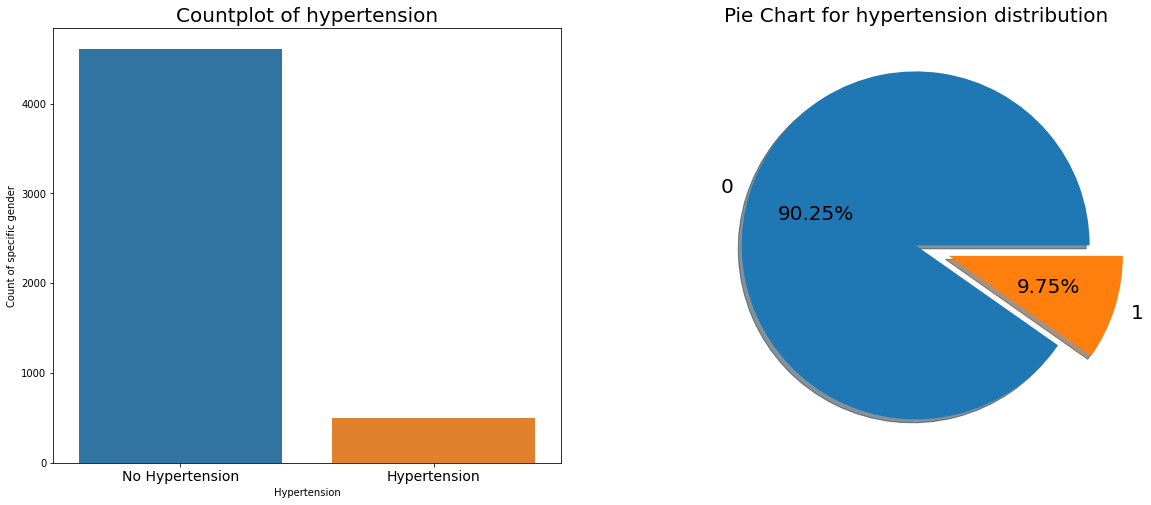

In [23]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x="hypertension", data= df, palette="tab10", ax=ax[0],)
ax[0].set(xlabel="Hypertension", ylabel="Count of specific gender")
ax[0].set_title('Countplot of hypertension',fontsize=20)
ax[0].set_xticklabels(['No Hypertension','Hypertension'], fontsize=14)
#Pie Chart of type of gender
type_counts = df.hypertension.value_counts()
plt.pie(type_counts, labels = type_counts.index, startangle=0, autopct="%1.2f%%", shadow=True,
        explode=(0,0.2),
        colors = sns.color_palette('tab10'),textprops={'fontsize':20})
plt.title("Pie Chart for hypertension distribution", fontsize=20)

### Distribution of Heart Disease

Text(0.5, 1.0, 'Pie Chart for heart_disease distribution')

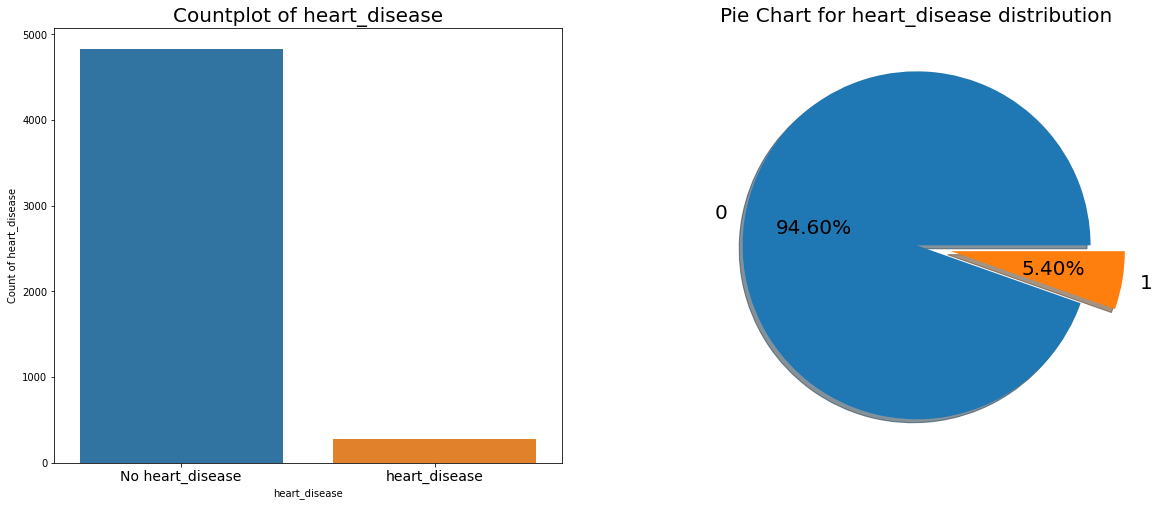

In [24]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x="heart_disease", data= df, palette="tab10", ax=ax[0],)
ax[0].set(xlabel="heart_disease", ylabel="Count of heart_disease")
ax[0].set_title('Countplot of heart_disease',fontsize=20)
ax[0].set_xticklabels(['No heart_disease','heart_disease'], fontsize=14)
#Pie Chart of type of gender
type_counts = df.heart_disease.value_counts()
plt.pie(type_counts, labels = type_counts.index, startangle=0, autopct="%1.2f%%", shadow=True,
        explode=(0,0.2),
        colors = sns.color_palette('tab10'),textprops={'fontsize':20})
plt.title("Pie Chart for heart_disease distribution", fontsize=20)

### Distribution of Marital Status

In [25]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

Text(0.5, 1.0, 'Pie Chart for ever_married distribution')

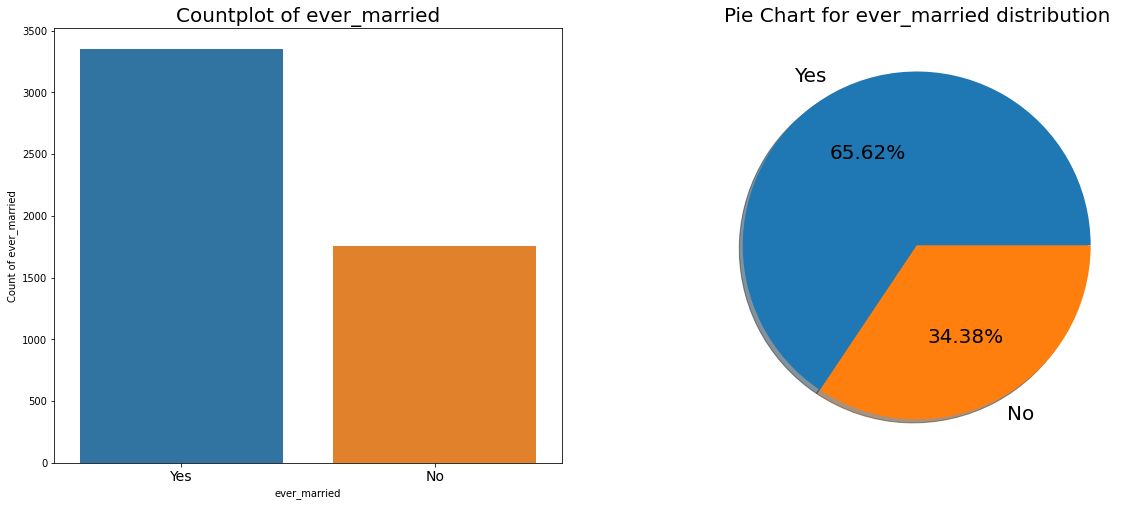

In [26]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x="ever_married", data= df, palette="tab10", ax=ax[0],)
ax[0].set(xlabel="ever_married", ylabel="Count of ever_married")
ax[0].set_title('Countplot of ever_married',fontsize=20)
ax[0].set_xticklabels(['Yes','No'], fontsize=14)
#Pie Chart of type of gender
type_counts = df.ever_married.value_counts()
plt.pie(type_counts, labels =['Yes','No'], startangle=0, autopct="%1.2f%%", shadow=True,
        explode=None,
        colors = sns.color_palette('tab10'),textprops={'fontsize':20})
plt.title("Pie Chart for ever_married distribution", fontsize=20)

### Distribution of work_type

In [27]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Text(0.5, 1.0, 'Pie Chart for work_type distribution')

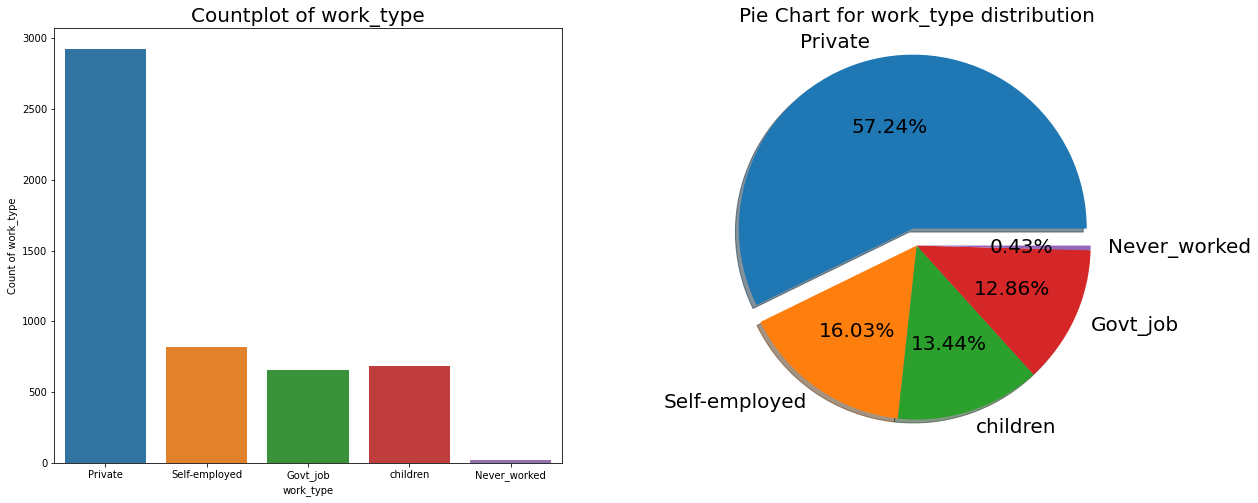

In [28]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x="work_type", data= df, palette="tab10", ax=ax[0],)
ax[0].set(xlabel="work_type", ylabel="Count of work_type")
ax[0].set_title('Countplot of work_type',fontsize=20)

#Pie Chart of type of ever_married
type_counts = df.work_type.value_counts()
plt.pie(type_counts, labels =type_counts.index, startangle=0, autopct="%1.2f%%", shadow=True,
        explode=(0.1,0,0,0,0),
        colors = sns.color_palette('tab10'),textprops={'fontsize':20})
plt.title("Pie Chart for work_type distribution", fontsize=20)

### Distribution of Residence Type

In [29]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

Text(0.5, 1.0, 'Pie Chart for Residence_type distribution')

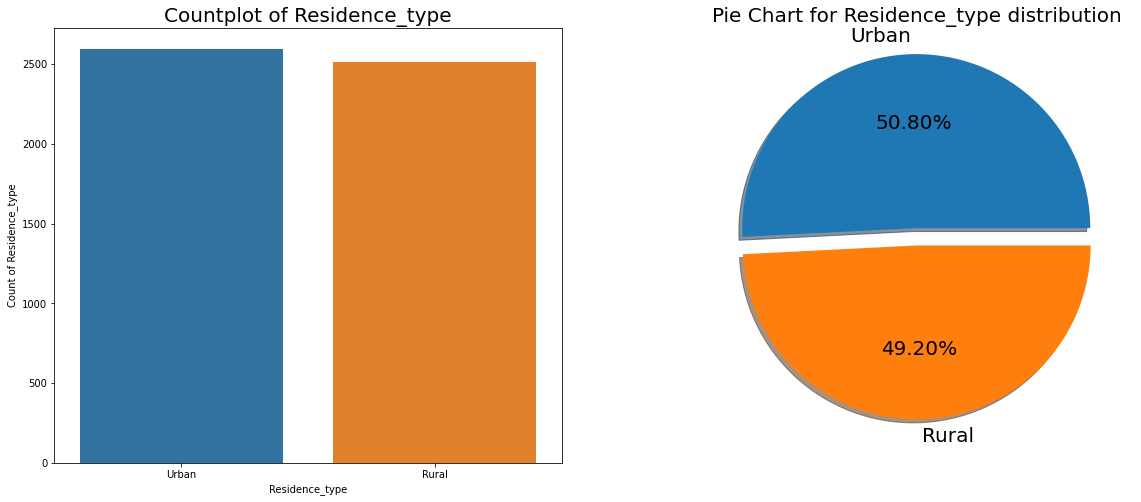

In [30]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x="Residence_type", data= df, palette="tab10", ax=ax[0],)
ax[0].set(xlabel="Residence_type", ylabel="Count of Residence_type")
ax[0].set_title('Countplot of Residence_type',fontsize=20)

#Pie Chart of type of ever_married
type_counts = df.Residence_type.value_counts()
plt.pie(type_counts, labels =type_counts.index, startangle=0, autopct="%1.2f%%", shadow=True,
        explode=(0.1,0),
        colors = sns.color_palette('tab10'),textprops={'fontsize':20})
plt.title("Pie Chart for Residence_type distribution", fontsize=20)

### Distribution of Smoking Status

In [31]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Text(0.5, 1.0, 'Pie Chart for Smoking Status distribution')

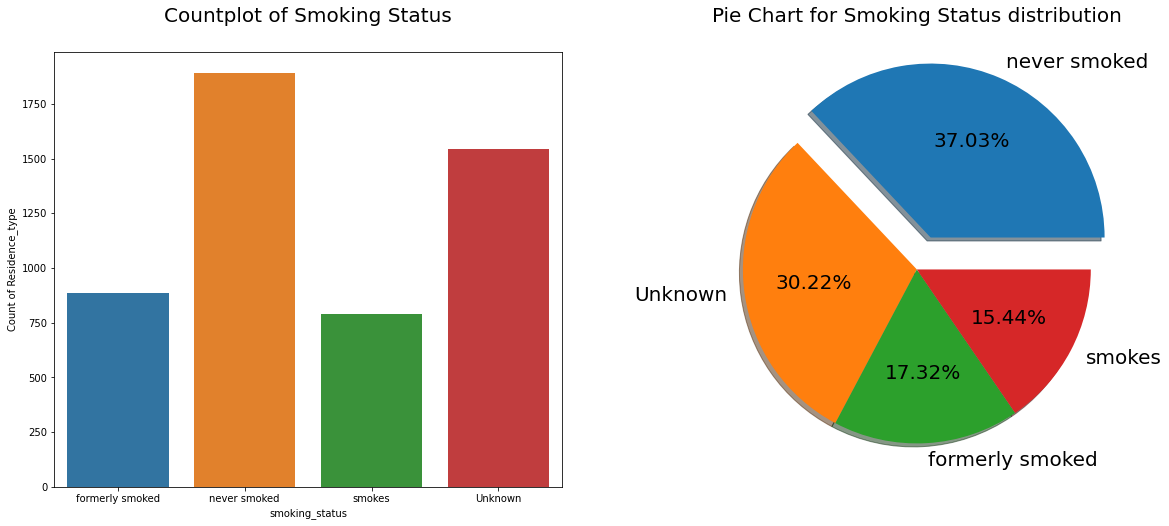

In [32]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x="smoking_status", data= df, palette="tab10", ax=ax[0],)
ax[0].set(xlabel="smoking_status", ylabel="Count of Residence_type")
ax[0].set_title('Countplot of Smoking Status',fontsize=20,pad=30)

#Pie Chart of type of ever_married
type_counts = df.smoking_status.value_counts()
plt.pie(type_counts, labels =type_counts.index, startangle=0, autopct="%1.2f%%", shadow=True,
        explode=(0.2,0,0,0),
        colors = sns.color_palette('tab10'),textprops={'fontsize':20})
plt.title("Pie Chart for Smoking Status distribution", fontsize=20,pad=30)

## Univariate analaysis of continuous features with target variable

In [33]:
continuos_num_features

['age', 'avg_glucose_level', 'bmi']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


<AxesSubplot:xlabel='age', ylabel='Density'>

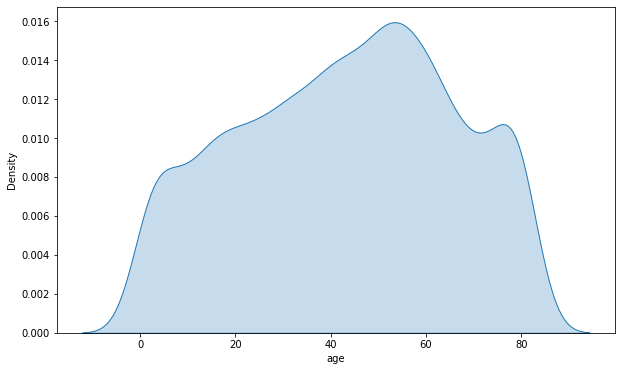

In [35]:
fig, ax= plt.subplots(figsize=(10,6))
sns.kdeplot(x='age',data=df,shade=True,ax=ax)

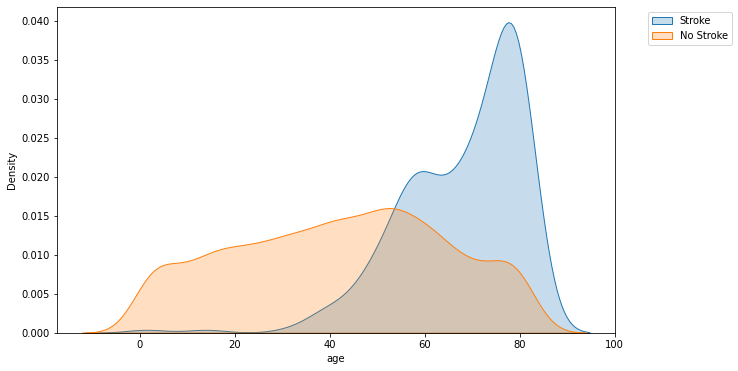

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
sns.kdeplot(x='age',data=df[df.stroke==1], shade=True, label='Stroke',ax=ax)
sns.kdeplot(x='age',data=df[df.stroke==0], shade=True, label='No Stroke',ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

From the above distribution plot, we can see that older people specially at around `80` years of age suffer from strokes.

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

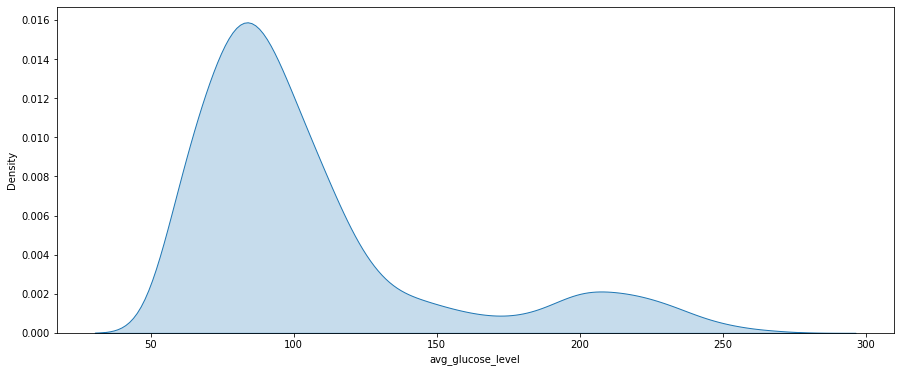

In [37]:
fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(x='avg_glucose_level',data=df, shade=True, ax=ax)

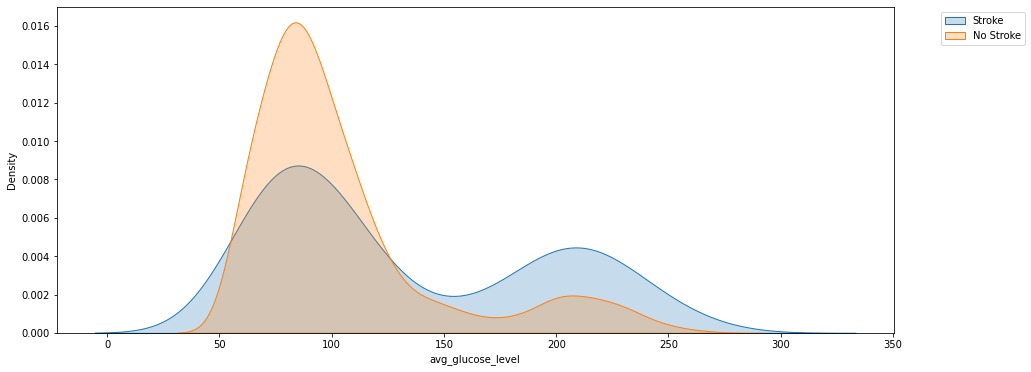

In [38]:
fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(x='avg_glucose_level',data=df[df.stroke==1], shade=True, label='Stroke', ax=ax)
sns.kdeplot(x='avg_glucose_level',data=df[df.stroke==0], shade=True, label='No Stroke',ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

<b>A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. </b>From the above distribution plot, it is not clear what level of glucose in the blood causes Stroke. The distribution appears to be left skewed and it can also be seen most of the people with regular glucose level also suffer from stroke. Therefore, it appears that blood glucose level does not have a good significant impace on strokes.

<AxesSubplot:xlabel='bmi', ylabel='Density'>

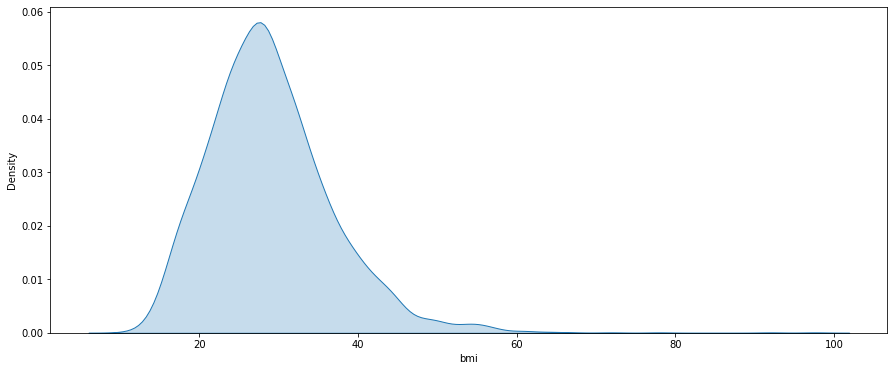

In [39]:
fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(x='bmi',data=df, shade=True, ax=ax)

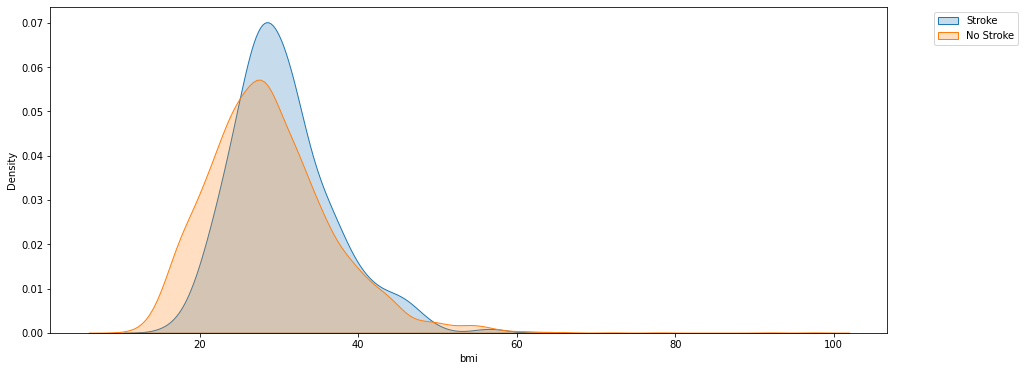

In [40]:
fig, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(x='bmi',data=df[df.stroke==1], shade=True, label='Stroke', ax=ax)
sns.kdeplot(x='bmi',data=df[df.stroke==0], shade=True, label='No Stroke',ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [41]:
print(f'max bmi: {df.bmi.max()}\nmin bmi: {df.bmi.min()}')

max bmi: 97.6
min bmi: 10.3


In [42]:
# Creating a dataframe with the information of the bmi for better understanding
pd.set_option('max_colwidth',150)
pd.DataFrame({
    'BMI': ['Below 18.5', '18.5-24.9', '25.0-29.9','30.0 above'],
    'Weight Status' :[
                    'Underweight',
                    'Healthy',
                    'Overweight',
                    'Obese'
                   ]                  
})

,BMI,Weight Status
0,Below 18.5,Underweight
1,18.5-24.9,Healthy
2,25.0-29.9,Overweight
3,30.0 above,Obese


From the above distriubition plot for `bmi` we can see that the plot is highly left skewed and the outliers are to the right. And greater the value of `bmi` higher is the possibility of having strokes

### Analysis of categorical variables

In [48]:
cat_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

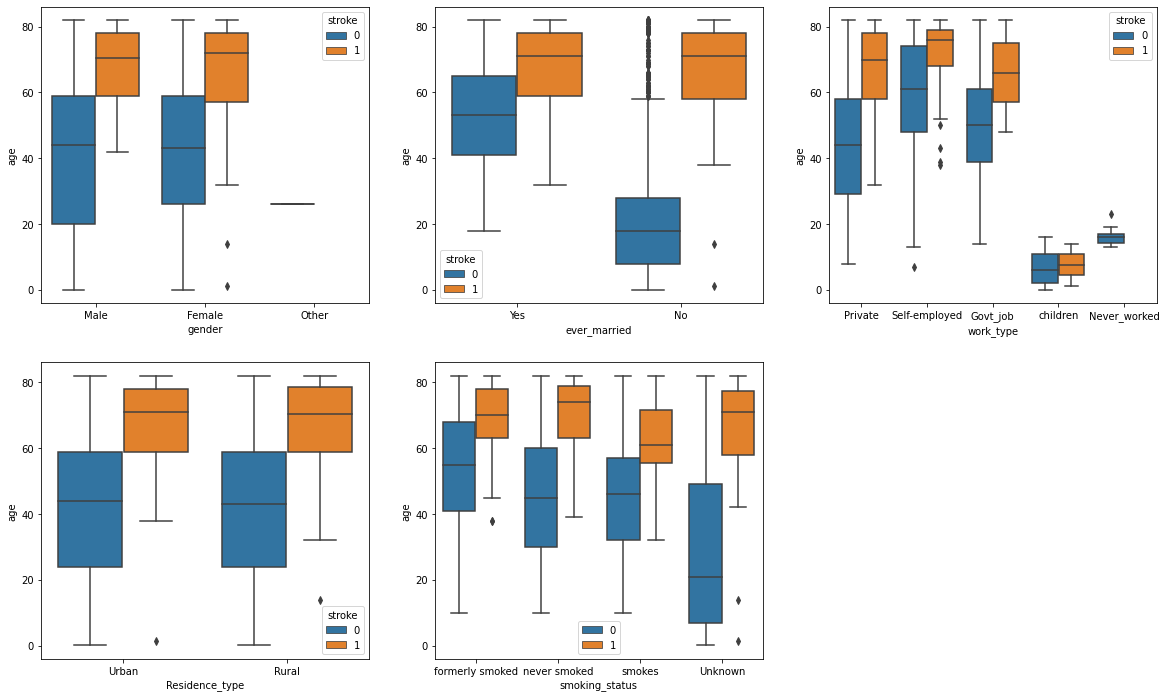

In [49]:
fig, ax = plt.subplots(2,3,figsize=(20,12))
fig.delaxes(ax[1][2])
i=0
for row in range(2):
    for col in range(3):
        if i < 5:
            sns.boxplot(x=cat_features[i], y='age',data=df, ax=ax[row][col], hue='stroke',)
            i+=1

plt.legend(loc='best')

Observations
- Irrespective of  the other features, older people have more possibility of having a stroke.

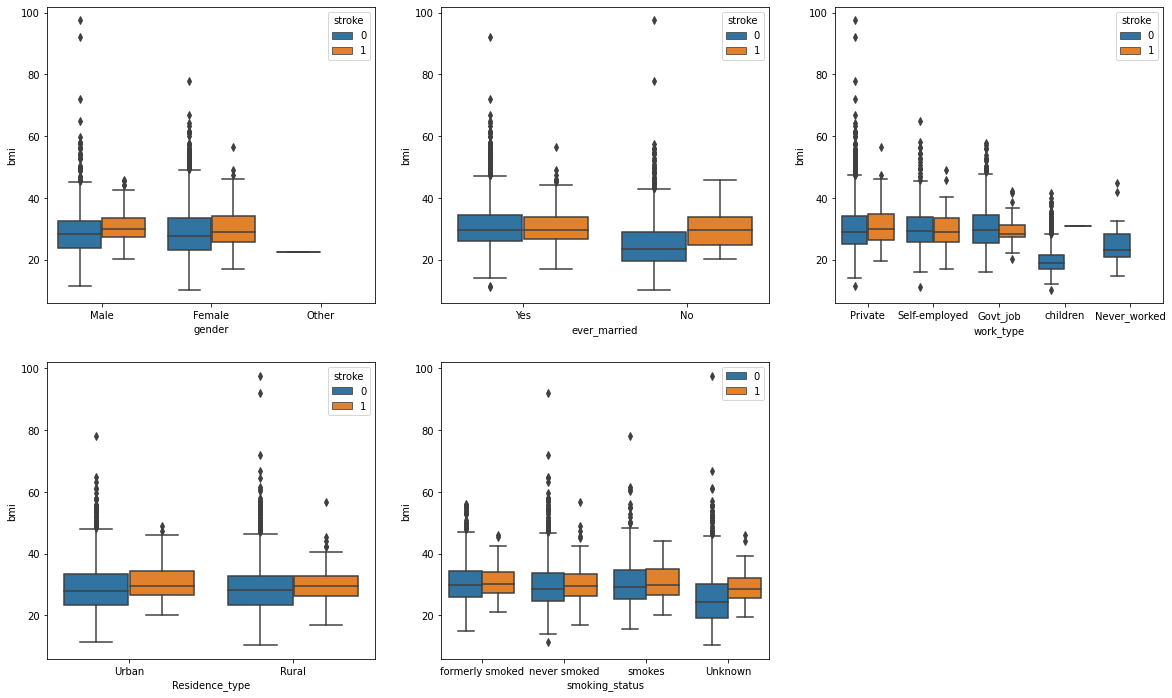

In [50]:
fig, ax = plt.subplots(2,3,figsize=(20,12))
fig.delaxes(ax[1][2])
i=0
for row in range(2):
    for col in range(3):
        if i < 5:
            sns.boxplot(x=cat_features[i], y='bmi',data=df, ax=ax[row][col], hue='stroke')
            i+=1
plt.legend(loc='best')

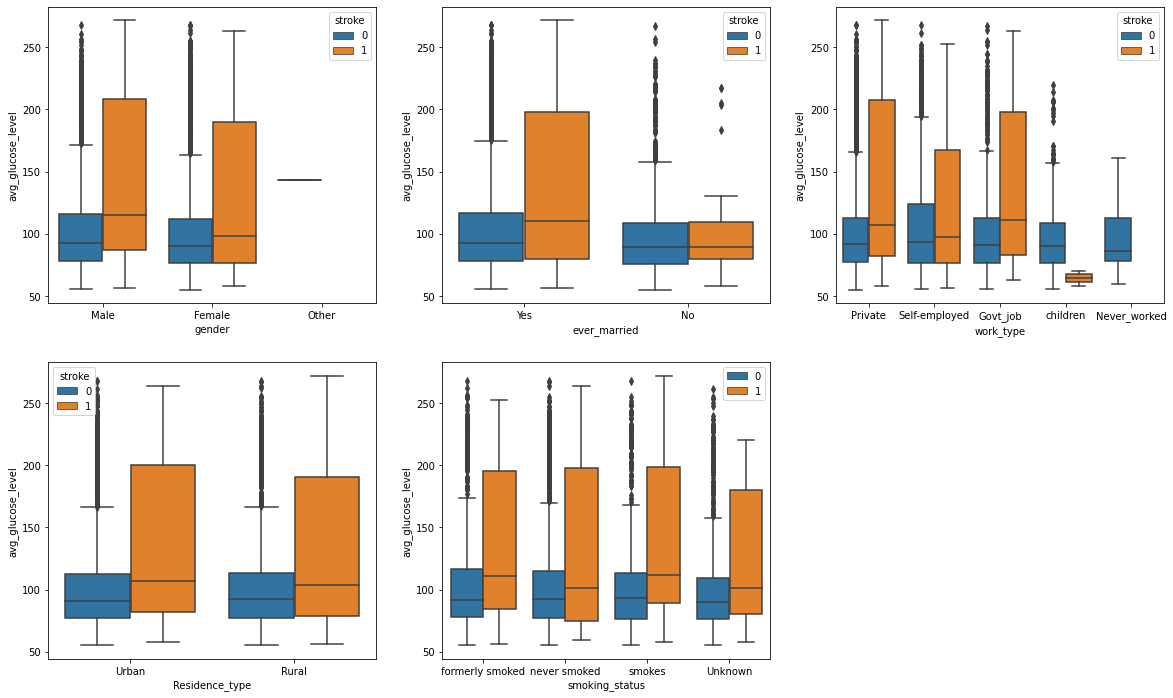

In [51]:
fig, ax = plt.subplots(2,3,figsize=(20,12))
fig.delaxes(ax[1][2])
i=0
for row in range(2):
    for col in range(3):
        if i < 5:
            sns.boxplot(x=cat_features[i], y='avg_glucose_level',data=df, ax=ax[row][col], hue='stroke')
            i+=1
plt.legend(loc='best')

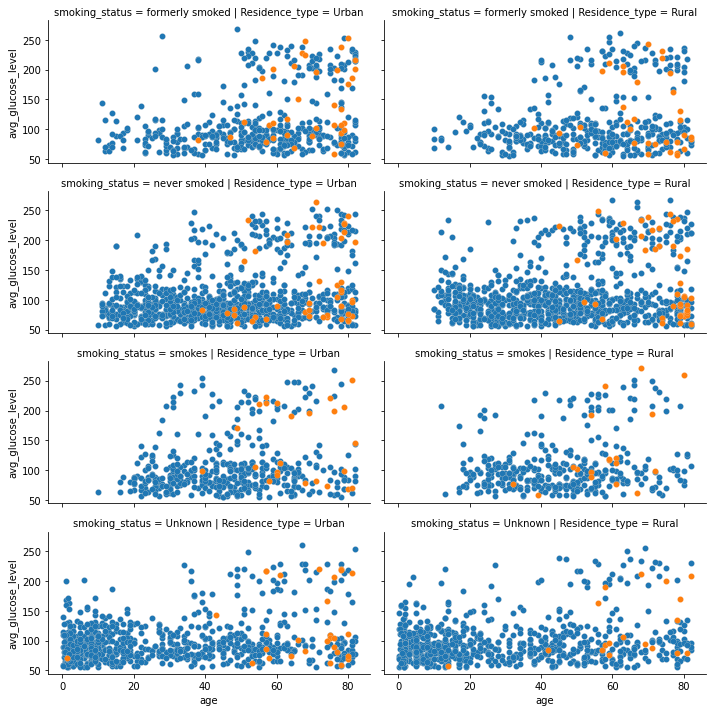

In [52]:
g = sns.FacetGrid(data=df, row='smoking_status', col='Residence_type', hue='stroke',
                  height=2.5, aspect=2, palette=sns.color_palette('tab10'))
g.map(plt.scatter, 'age', 'avg_glucose_level', edgecolor='#EAE0D5', lw=0.2)

Observation:
- Type of Residence either Urban or Rural has no effect on having stroke.



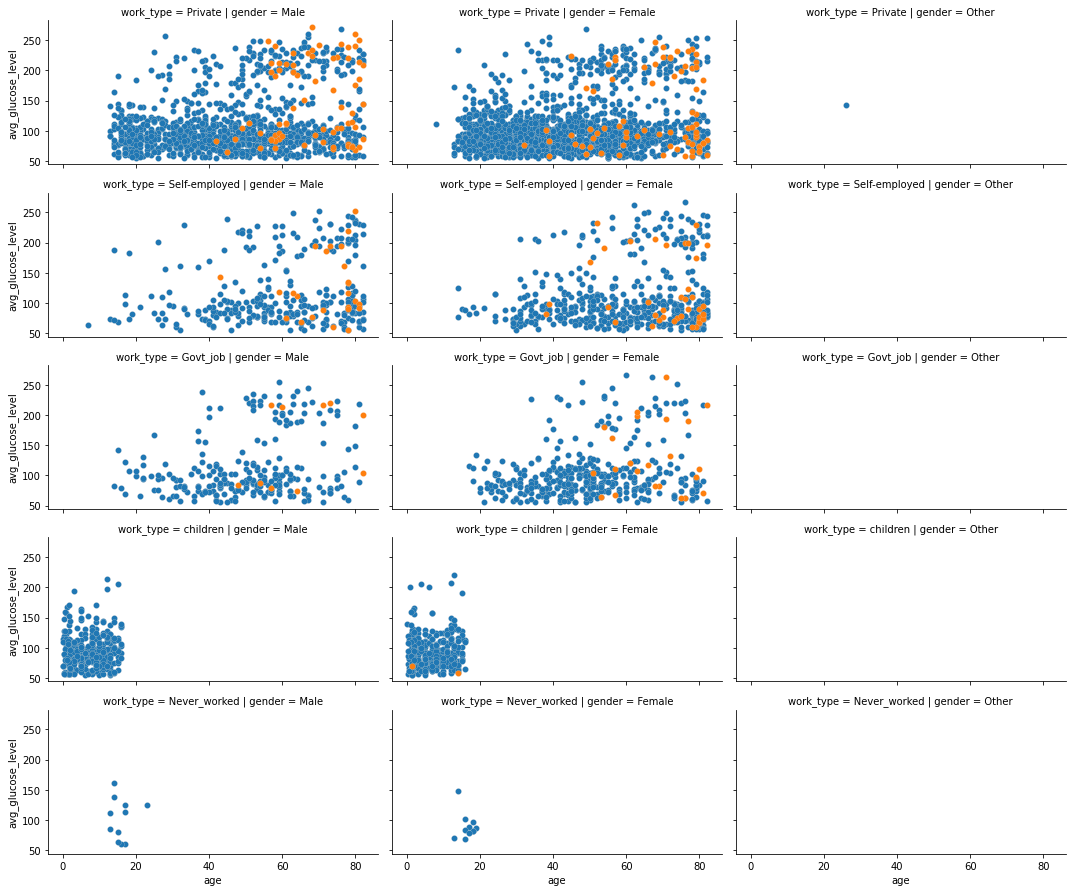

In [53]:
g = sns.FacetGrid(data=df, row='work_type', col='gender', hue='stroke',
                  height=2.5, aspect=2, palette=sns.color_palette('tab10'))
g.map(plt.scatter, 'age', 'avg_glucose_level', edgecolor='#EAE0D5', lw=0.2)

Observations:
- Only 2 children have strokes and both are female
- work_type seems to play an important factor for stroke.



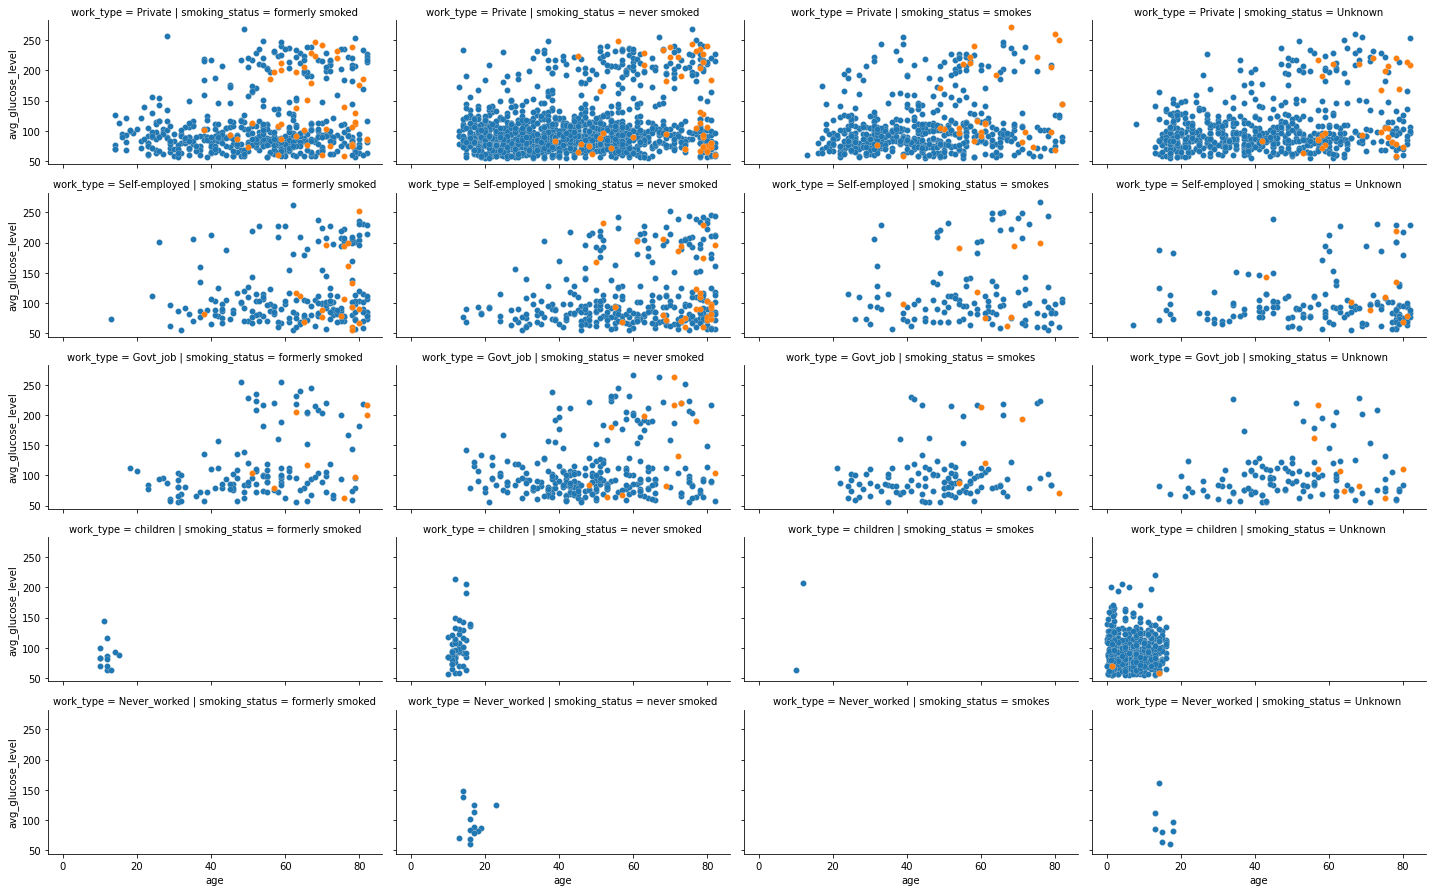

In [54]:
g = sns.FacetGrid(data=df, row='work_type', col='smoking_status', hue='stroke',
                  height=2.5, aspect=2, palette=sns.color_palette('tab10'))
g.map(plt.scatter, 'age', 'avg_glucose_level', edgecolor='#EAE0D5', lw=0.2)

<AxesSubplot:xlabel='gender', ylabel='bmi'>

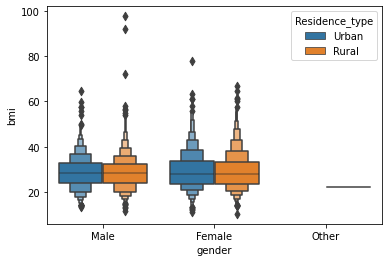

In [76]:
sns.boxenplot(data=df, x='gender',y='bmi',hue='Residence_type')

<AxesSubplot:xlabel='Residence_type', ylabel='bmi'>

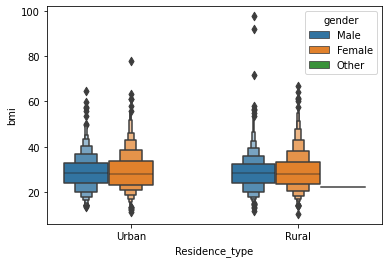

In [77]:
sns.boxenplot(data=df, x='Residence_type',y='bmi',hue='gender')

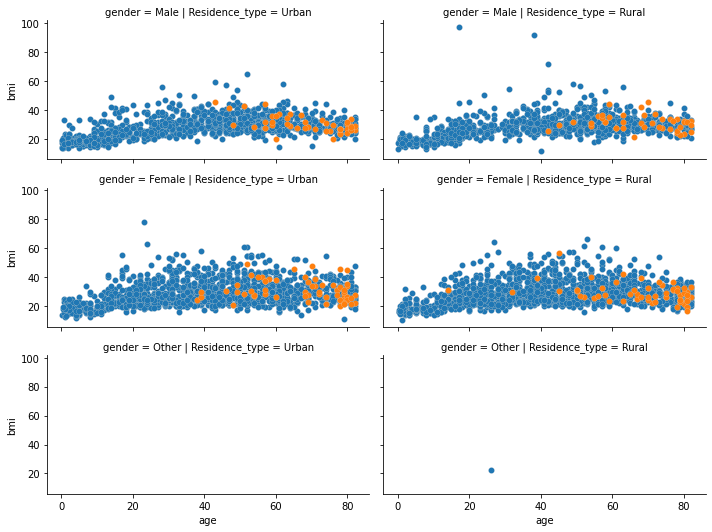

In [78]:
g = sns.FacetGrid(data=df, row='gender', col='Residence_type', hue='stroke',
                  height=2.5, aspect=2, palette=sns.color_palette('tab10'))
g.map(plt.scatter, 'age', 'bmi', edgecolor='#EAE0D5', lw=0.2)

Observations
- Majority of the people who had stroke work in private sector and have smoked or are smoking.

## Handling Missing Values

### Checking if there are any missing values

In [79]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [80]:
len(df)

5110

In [81]:
df.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [82]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

smoking_status       0.302153
bmi                  0.039335
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
stroke               0.000000
dtype: float64

Here, we can see from the above statistics that from the 5110 observations 201 observation which is about `3.93%` of the total dataset have `null` values for `bmi` feature.

Also we know from the Kaggle dataset description that the `"Unknown"` in `smoking_status` means that the information is unavailable for this patient. So this can be treated as a null value as well.

In [83]:
df['smoking_status'].value_counts()

never smoked       1892
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [84]:
df['smoking_status'].value_counts()/len(df)

never smoked       0.370254
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64

Here, we can see from the above statistics that from the 5110 observations 1544 observation which is about `30.21%` of the total dataset have `null` values for `smoking_status` feature.

In [85]:
#Replacing 'Unknown' with Nan values
df['smoking_status'].replace(to_replace='Unknown',value=np.nan,inplace=True)

### Visualizing the missing data

<AxesSubplot:>

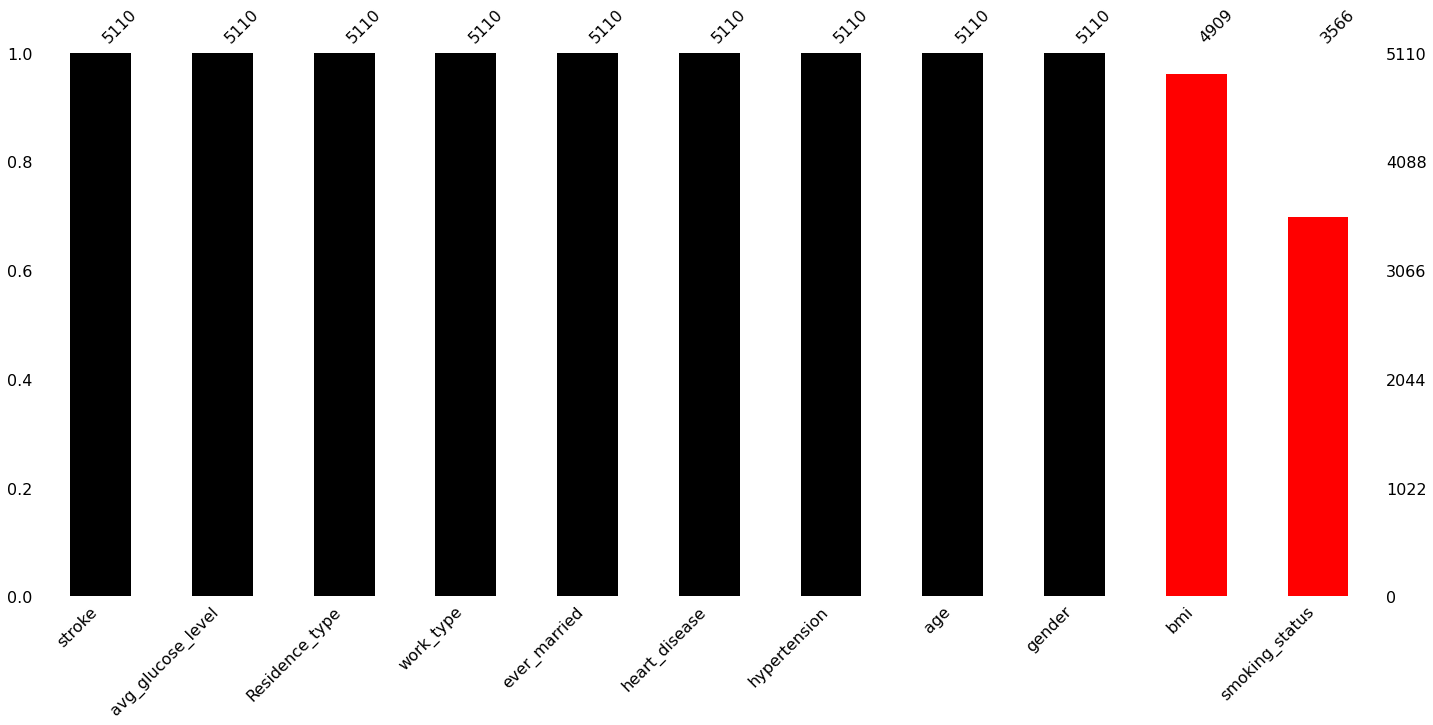

In [86]:
msno.bar(df,sort='descending', color=['black']*9+['red']*2)

We know that about `3.83%` of `bmi` and around `30.21%` of `smoking_status` values are missing.

In [87]:
len(df[df.bmi.isna() & df.smoking_status.isna()])/len(df)*100

1.1937377690802349

Here, we can see that in `1.19%` of the cases both `bmi` and `smoking_status` are missing.

Generally, it is considered if less than 5% of the dataset is missing we can simply drop those missing values, but since the dataset is small we cannot drop these observations. Therefore we explore other options such as imputing the missing values.

In [88]:
cat_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [89]:
df.groupby(['gender','Residence_type'])['bmi'].mean()

gender  Residence_type
Female  Rural             29.043952
        Urban             29.086780
Male    Rural             28.686948
        Urban             28.609655
Other   Rural             22.400000
Name: bmi, dtype: float64

In [90]:
female_rural = df.groupby(['gender','Residence_type'])['bmi'].mean().values[0]
female_urban = df.groupby(['gender','Residence_type'])['bmi'].mean().values[1]
male_rural = df.groupby(['gender','Residence_type'])['bmi'].mean().values[2]
male_urban = df.groupby(['gender','Residence_type'])['bmi'].mean().values[3]

In [91]:
female_rural, female_urban, male_rural, male_urban

(29.04395218002813, 29.086779661016948, 28.68694779116466, 28.60965517241379)

In [92]:
df.bmi.isna().sum()

201

In [93]:
#Setting all the null values in  bmi  
df.loc[((df.bmi.isna()) & (df.gender=='Female') & (df.Residence_type=='Rural').values), 'bmi'] = female_rural
df.loc[((df.bmi.isna()) & (df.gender=='Female') & (df.Residence_type=='Urban').values), 'bmi'] = female_urban
df.loc[((df.bmi.isna()) & (df.gender=='Male') & (df.Residence_type=='Rural').values), 'bmi'] = male_rural
df.loc[((df.bmi.isna()) & (df.gender=='Male') & (df.Residence_type=='Urban').values), 'bmi'] = male_urban

In [94]:
df.bmi.isna().sum()

0

<AxesSubplot:>

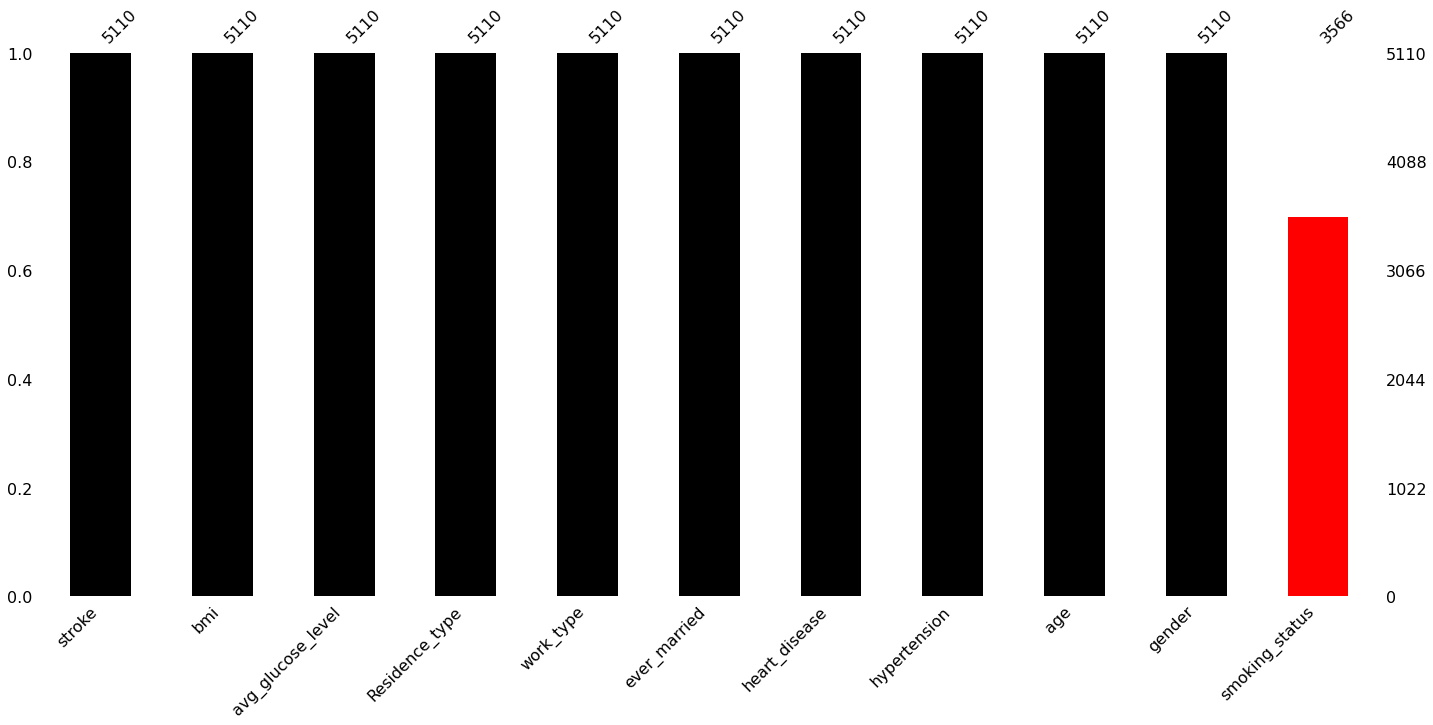

In [95]:
msno.bar(df,sort='descending', color=['black']*10+['red']*1)

#### Imputing the missing values in `smoking_status` with the most frequent value

In [96]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.043952,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [97]:
df.smoking_status.value_counts()

never smoked       1892
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [98]:
df['smoking_status'].replace(to_replace=np.nan, value='never smoked',inplace=True)

<AxesSubplot:>

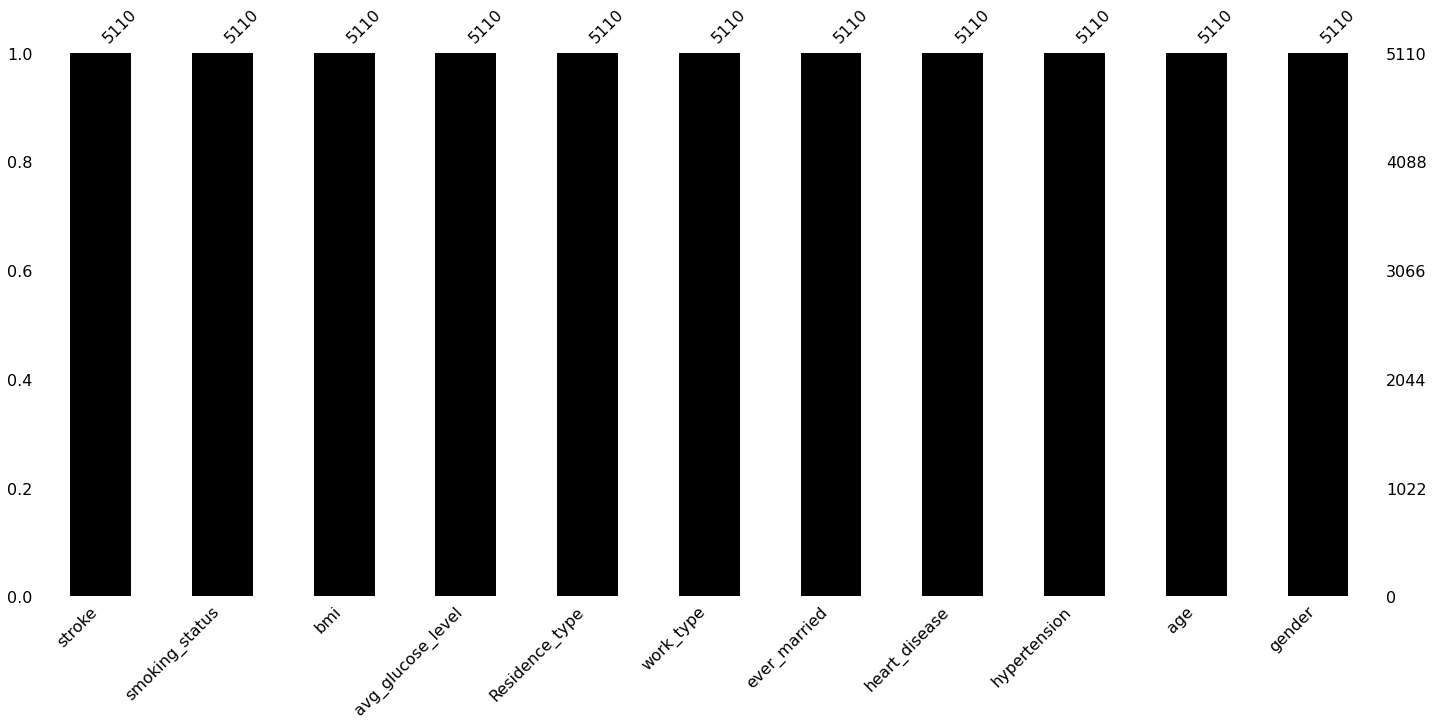

In [99]:
msno.bar(df,sort='descending', color=['black']*11)

<!-- ### Binning Continuous Variables -->

<!-- ![image.png](attachment:image.png) -->

In [70]:
# #binning continuous variables
# df['age_bin'] = pd.cut(df['age'],bins=[0,13,19,45,65,150],right=True,labels=['Children','Teenager','Adult','Middle Aged','Elderly'])
# df['avg_glucose_bin'] = pd.cut(df['avg_glucose_level'], bins=[0,50,115,380],right=True,labels=['Low','Nomral','High'])
# df['bmi_bin'] = pd.cut(df['bmi'], bins=[0,19,25,30,1000],right=True, labels=['Underweight','Normal','Overweight','Obese'])

In [71]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.043952,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


### Encoding Categorical Features

In [72]:
new_df = df.copy()

In [73]:
new_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.043952,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [74]:
new_df[new_df['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [75]:
new_df.drop(index=3116,inplace=True)

In [76]:
new_df.reset_index(inplace=True)

In [77]:
new_df.shape

(5109, 12)

In [78]:
one_hot_df = pd.get_dummies(new_df[['gender','ever_married','Residence_type','work_type','smoking_status']],drop_first=True)
one_hot_df

,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,1,1,1,0,1,0,0,0,0
1,0,1,0,0,0,1,0,1,0
2,1,1,0,0,1,0,0,1,0
3,0,1,1,0,1,0,0,0,1
4,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
5104,0,1,1,0,1,0,0,1,0
5105,0,1,1,0,0,1,0,1,0
5106,0,1,0,0,0,1,0,1,0
5107,1,1,0,0,1,0,0,0,0


In [79]:
new_df = pd.concat([new_df,one_hot_df],axis=1)
new_df.drop(['index','gender','ever_married','Residence_type','work_type','smoking_status'],axis=1,inplace=True)

In [80]:
new_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,1,1,0,1,0,0,0,0
1,61.0,0,0,202.21,29.043952,1,0,1,0,0,0,1,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,1,1,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,80.0,1,0,83.75,29.086780,0,0,1,1,0,1,0,0,1,0
5105,81.0,0,0,125.20,40.000000,0,0,1,1,0,0,1,0,1,0
5106,35.0,0,0,82.99,30.600000,0,0,1,0,0,0,1,0,1,0
5107,51.0,0,0,166.29,25.600000,0,1,1,0,0,1,0,0,0,0


## Handling Imbalanced Dataset

Text(0.5, 1.0, "Pie Chart for 'stroke' distribution")

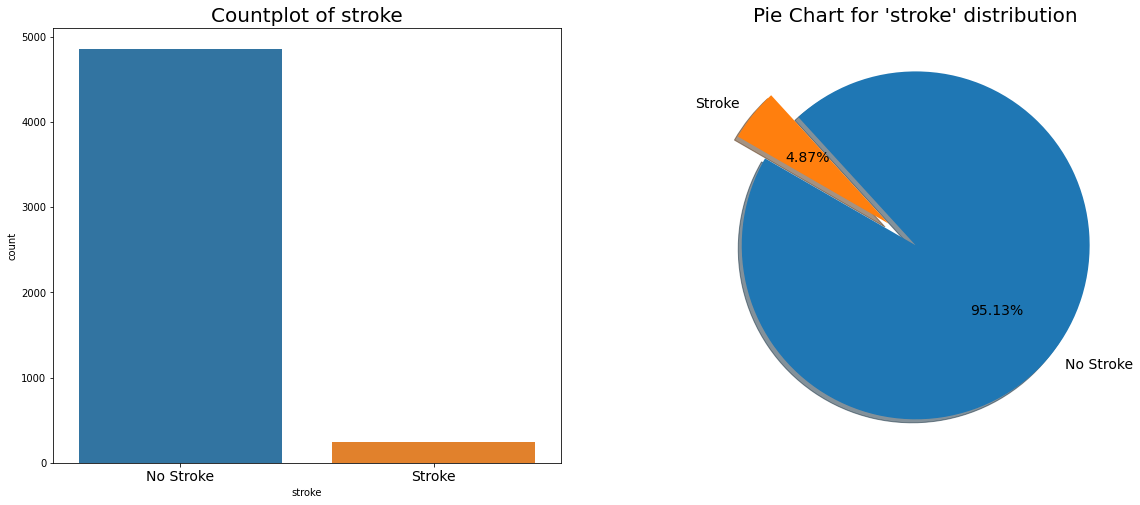

In [81]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x="stroke", data= new_df, palette="tab10",ax=ax[0])
ax[0].set_title('Countplot of stroke',fontsize=20)
ax[0].set_xticklabels(['No Stroke','Stroke'], fontsize=14)

#Pie Chart of type of gender
type_counts = new_df.stroke.value_counts()
ax[1].pie(type_counts, labels=['No Stroke','Stroke'],startangle=150, autopct="%1.2f%%", shadow=True,
        explode=(0,0.2),
        colors = sns.color_palette('tab10'),textprops={'fontsize':14})
plt.title("Pie Chart for 'stroke' distribution", fontsize=20)

Since, we have an imbalanced dataset we are going to use an oversampling technique to try and increase the samples of the minimum labels. Suppose, we have two labels 0 and 1 and we have 10000 0 labels and only 100 1 labels. Then we try to increase the number of samples for 1 by picking samples at random with replacement.

Here, we will be using an oversampling technique called `SMOTE (Synthetic Minority Oversampling Technique)` which will synthesize new sample for the minority class `Strokt` to have the same number of samples as the majority class `No Stroke`. Here, we will be using an oversampling technique becase we do not want to loose the significant amount of observations as abour 95.13% of our dataset consists of the majority class.

In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
new_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,1,1,0,1,0,0,0,0
1,61.0,0,0,202.21,29.043952,1,0,1,0,0,0,1,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,1,1,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,1,0,0,0,1,0,1,0


In [84]:
new_df.loc[:, new_df.columns!='stroke']

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,1,0,1,0,0,0,0
1,61.0,0,0,202.21,29.043952,0,1,0,0,0,1,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.400000,0,1,1,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,80.0,1,0,83.75,29.086780,0,1,1,0,1,0,0,1,0
5105,81.0,0,0,125.20,40.000000,0,1,1,0,0,1,0,1,0
5106,35.0,0,0,82.99,30.600000,0,1,0,0,0,1,0,1,0
5107,51.0,0,0,166.29,25.600000,1,1,0,0,1,0,0,0,0


In [85]:
smote = SMOTE(sampling_strategy='minority')
X,y = smote.fit_resample(new_df.loc[:, new_df.columns!='stroke'],new_df['stroke'])

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "Pie Chart for 'stroke' distribution")

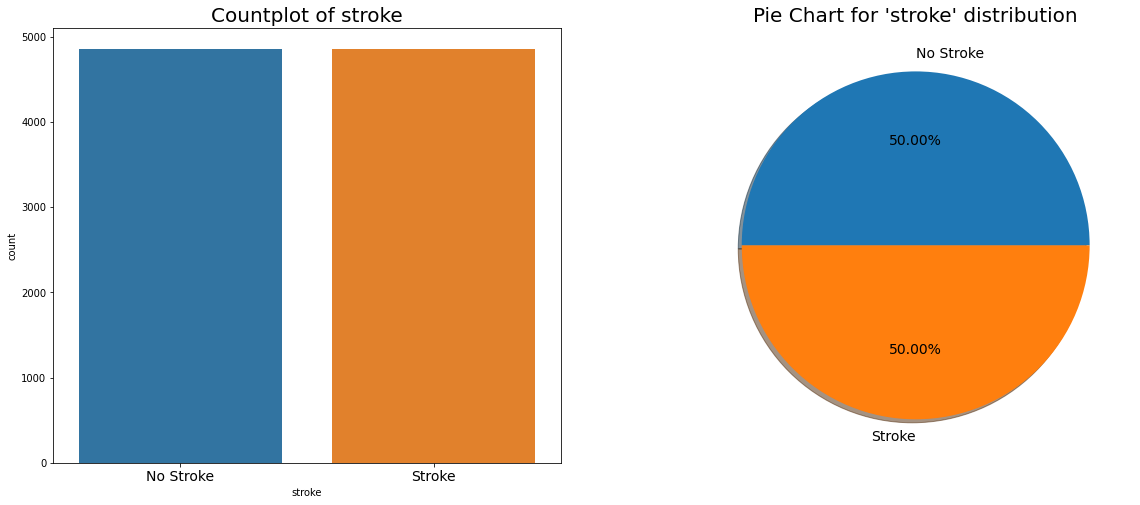

In [86]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.countplot(y, palette="tab10",ax=ax[0])
ax[0].set_title('Countplot of stroke',fontsize=20)
ax[0].set_xticklabels(['No Stroke','Stroke'], fontsize=14)

#Pie Chart of type of gender
type_counts = y.value_counts()
ax[1].pie(type_counts, labels=['No Stroke','Stroke'],startangle=0, autopct="%1.2f%%", shadow=True,
        explode=None,
        colors = sns.color_palette('tab10'),textprops={'fontsize':14})
plt.title("Pie Chart for 'stroke' distribution", fontsize=20)

### Checking the correlation between features

<AxesSubplot:>

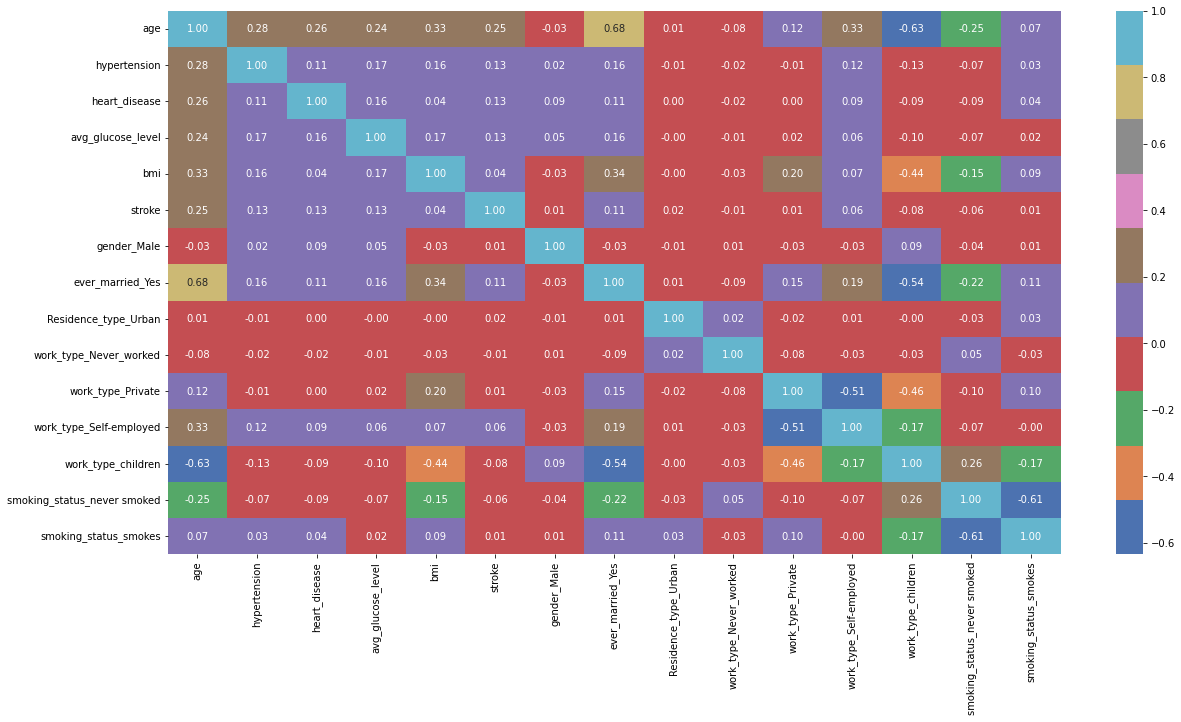

In [87]:
plt.figure(figsize=(20,10))
sns.heatmap(new_df.corr(),annot=True, fmt='.2f',cmap=sns.palettes.SEABORN_PALETTES['deep'])

## Splitting Training and Testing Dataset

In [88]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,67.000000,0,1,228.690000,36.600000,1,1,1,0,1,0,0,0,0
1,61.000000,0,0,202.210000,29.043952,0,1,0,0,0,1,0,1,0
2,80.000000,0,1,105.920000,32.500000,1,1,0,0,1,0,0,1,0
3,49.000000,0,0,171.230000,34.400000,0,1,1,0,1,0,0,0,1
4,79.000000,1,0,174.120000,24.000000,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,77.610084,0,0,90.115916,28.888574,0,0,0,0,0,1,0,1,0
9716,78.310177,0,0,61.314804,29.043952,0,0,0,0,0,0,0,0,0
9717,62.870321,0,0,207.449785,45.520822,0,1,1,0,1,0,0,0,0
9718,72.592234,0,0,195.136796,33.065048,0,1,1,0,0,1,0,0,0


In [89]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9715    1
9716    1
9717    1
9718    1
9719    1
Name: stroke, Length: 9720, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [92]:
X_train.shape

(7776, 14)

In [93]:
X_test.shape

(1944, 14)

## Standardizing data

In [94]:
# from sklearn.preprocessing import StandardScaler

In [95]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

In [96]:
# pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [97]:
# pd.DataFrame(X_test_scaled,columns=X_test.columns)

## Building and Evaluating Models

In [98]:
import time
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score

### Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()
logreg = LogisticRegression()
steps = [('scalar',StandardScaler()),
        ('logistic_regression', logreg)]
pipeline = Pipeline(steps)


#fitting the model
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
end_time = time.time()
print(f'Training Time: {(end_time - start_time):.2f} seconds')

#Checking Accuracy of the model
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

print(f'Confusion Matrix:\n {confusion_matrix}')
print(f'Accuracy: {metrics.accuracy_score(y_test, predictions)}')
print(f'Precision: {metrics.precision_score(y_test,predictions)}')
print(f'Recall: {metrics.recall_score(y_test,predictions)}')
print(f'F1 Score: {metrics.f1_score(y_test,predictions)}')


Training Time: 0.05 seconds
Confusion Matrix:
 [[812 164]
 [121 847]]
Accuracy: 0.8533950617283951
Precision: 0.837784371909001
Recall: 0.875
F1 Score: 0.8559878726629612


ROC-AUC Score: 0.9294070078580139


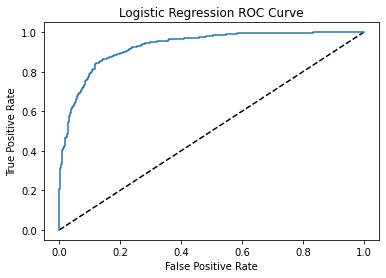

In [100]:
predictions_prob = pipeline.predict_proba(X_test)[:,1]
print(f'ROC-AUC Score: {roc_auc_score(y_test, predictions_prob)}')
fpr, tpr, thresholds= roc_curve(y_test, predictions_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [101]:
cv_scores = cross_val_score(pipeline, X_train,y_train,cv=5,scoring='accuracy')
cv_scores

array([0.85218509, 0.84244373, 0.85401929, 0.85787781, 0.85144695])

In [102]:
cv_scores.mean()

0.8515945742649551

#### Using GridSearch to find the optimal parameters for the Logistic Regression

In [103]:
start_time = time.time()
logreg = LogisticRegression()
steps = [('scalar',StandardScaler()),
        ('logistic_regression', logreg)]
pipeline = Pipeline(steps)

parameters = {
    'logistic_regression__solver': ['lbfgs','liblinear'],
}
cv = GridSearchCV(pipeline, param_grid=parameters,cv=5)

#fitting the model
cv.fit(X_train,y_train)
predictions = cv.predict(X_test)
end_time = time.time()
print(f'Training Time: {(end_time - start_time):.2f} seconds')

#Printing Best Parameters
print(f'Best Parameters: {cv.best_params_}')

#Printing Best Score
print(f'Best Score: {cv.best_score_}')

Training Time: 0.39 seconds
Best Parameters: {'logistic_regression__solver': 'lbfgs'}
Best Score: 0.8515945742649551


### Support Vector Machine (SVM)

In [104]:
from sklearn.svm import SVC

start_time = time.time()
steps = [('scalar',StandardScaler()),
        ('svm', SVC(probability=True))]
pipeline = Pipeline(steps)


#fitting the model
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
end_time = time.time()
print(f'Training Time: {(end_time - start_time):.2f} seconds')

#Checking Accuracy of the model
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

print(f'Confusion Matrix:\n {confusion_matrix}')
print(f'Accuracy: {metrics.accuracy_score(y_test, predictions)}')
print(f'Precision: {metrics.precision_score(y_test,predictions)}')
print(f'Recall: {metrics.recall_score(y_test,predictions)}')
print(f'F1 Score: {metrics.f1_score(y_test,predictions)}')

Training Time: 6.48 seconds
Confusion Matrix:
 [[834 142]
 [ 93 875]]
Accuracy: 0.8791152263374485
Precision: 0.8603736479842674
Recall: 0.9039256198347108
F1 Score: 0.8816120906801007


ROC-AUC Score: 0.9436755901978051


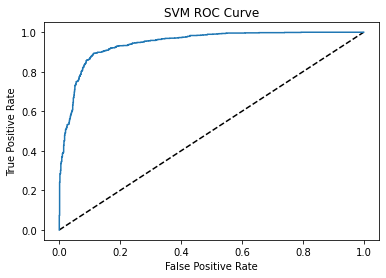

In [105]:
predictions_prob = pipeline.predict_proba(X_test)[:,1]
print(f'ROC-AUC Score: {roc_auc_score(y_test, predictions_prob)}')
fpr, tpr, thresholds= roc_curve(y_test, predictions_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistric Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.show()

In [106]:
cv_scores = cross_val_score(pipeline, X_train,y_train,cv=5,scoring='accuracy')
cv_scores

array([0.8688946 , 0.87009646, 0.88874598, 0.8829582 , 0.89003215])

In [107]:
cv_scores.mean()

0.8801454797940138

#### Using GridSearch to find the optimal parameters for the SVC

In [108]:
start_time = time.time()
logreg = SVC()
steps = [('scalar',StandardScaler()),
        ('svm', SVC(probability=True))]
pipeline = Pipeline(steps)

parameters = {
    'svm__kernel': ['rbf', 'poly', 'sigmoid'],
}
cv = GridSearchCV(pipeline, param_grid=parameters,cv=5)

#fitting the model
cv.fit(X_train,y_train)
predictions = cv.predict(X_test)
end_time = time.time()
print(f'Training Time: {(end_time - start_time):.2f} seconds')

#Printing Best Parameters
print(f'Best Parameters: {cv.best_params_}')

#Printing Best Score
print(f'Best Score: {cv.best_score_}')

Training Time: 60.87 seconds
Best Parameters: {'svm__kernel': 'rbf'}
Best Score: 0.8801454797940138


### Decision Trees

In [149]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
steps = [
            ('dtree', DecisionTreeClassifier())
        ]
pipeline = Pipeline(steps)


#fitting the model
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
end_time = time.time()
print(f'Training Time: {(end_time - start_time):.2f} seconds')

#Checking Accuracy of the model
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

print(f'Confusion Matrix:\n {confusion_matrix}')
print(f'Accuracy: {metrics.accuracy_score(y_test, predictions)}')
print(f'Precision: {metrics.precision_score(y_test,predictions)}')
print(f'Recall: {metrics.recall_score(y_test,predictions)}')
print(f'F1 Score: {metrics.f1_score(y_test,predictions)}')

Training Time: 0.03 seconds
Confusion Matrix:
 [[885  91]
 [ 83 885]]
Accuracy: 0.9104938271604939
Precision: 0.9067622950819673
Recall: 0.9142561983471075
F1 Score: 0.9104938271604939


In [110]:
cv_scores = cross_val_score(pipeline, X_train,y_train,cv=5,scoring='accuracy')
cv_scores

array([0.89524422, 0.90482315, 0.9022508 , 0.89967846, 0.92411576])

In [111]:
cv_scores.mean()

0.9052224766281751

#### Using GridSearch to find the optimal parameters for the DecisionTreeClassifier

In [112]:
start_time = time.time()
logreg = LogisticRegression()
steps = [
            ('dtree', DecisionTreeClassifier())
        ]
pipeline = Pipeline(steps)

parameters = {
    'dtree__criterion': ['gini','entropy'],
    'dtree__splitter': ['best','random'],
    'dtree__max_features': ['auto','log2',None],
    'dtree__max_depth': np.arange(1,26)
}
cv = GridSearchCV(pipeline, param_grid=parameters,cv=5)

#fitting the model
cv.fit(X_train,y_train)
predictions = cv.predict(X_test)
end_time = time.time()
print(f'Training Time: {(end_time - start_time):.2f} seconds')

#Printing Best Parameters
print(f'Best Parameters: {cv.best_params_}')

#Printing Best Score
print(f'Best Score: {cv.best_score_}')

Training Time: 13.64 seconds
Best Parameters: {'dtree__criterion': 'entropy', 'dtree__max_depth': 22, 'dtree__max_features': None, 'dtree__splitter': 'best'}
Best Score: 0.9121667396820936


### K-Nearest Neighbor Classifier

In [113]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()
steps = [
            ('scalar',StandardScaler()),
            ('knn', KNeighborsClassifier())
        ]
pipeline = Pipeline(steps)

#fitting the model
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
end_time = time.time()
print(f'Training Time: {(end_time - start_time):.2f} seconds')

#Checking Acuracy of the model
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

print(f'Confusion Matrix:\n {confusion_matrix}')
print(f'Accuracy: {metrics.accuracy_score(y_test, predictions)}')
print(f'Precision: {metrics.precision_score(y_test,predictions)}')
print(f'Recall: {metrics.recall_score(y_test,predictions)}')
print(f'F1 Score: {metrics.f1_score(y_test,predictions)}')

Training Time: 0.30 seconds
Confusion Matrix:
 [[836 140]
 [ 54 914]]
Accuracy: 0.9002057613168725
Precision: 0.8671726755218216
Recall: 0.9442148760330579
F1 Score: 0.904055390702275


ROC-AUC Score: 0.9561622535902994


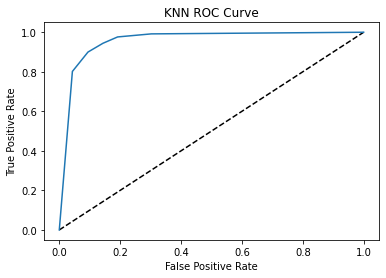

In [114]:
predictions_prob = pipeline.predict_proba(X_test)[:,1]
print(f'ROC-AUC Score: {roc_auc_score(y_test, predictions_prob)}')
fpr, tpr, thresholds= roc_curve(y_test, predictions_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistric Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()

In [115]:
cv_scores = cross_val_score(pipeline, X_train,y_train,cv=5,scoring='accuracy')
cv_scores

array([0.88239075, 0.89710611, 0.88488746, 0.8926045 , 0.89646302])

In [116]:
cv_scores.mean()

0.8906903677497746

#### Using GridSearch to find the optimal parameters for the KNearest Neighbor Classifier

In [117]:
start_time = time.time()
logreg = KNeighborsClassifier()
steps = [
            ('scalar',StandardScaler()),
            ('knn', KNeighborsClassifier())
        ]
pipeline = Pipeline(steps)

parameters = {
    'knn__n_neighbors': np.arange(1,20),
    'knn__weights': ['uniform','distance'],
    'knn__metric': ['euclidean','minkowski',]
}

cv = GridSearchCV(pipeline, param_grid=parameters,cv=5)

#fitting the model
cv.fit(X_train,y_train)
predictions = cv.predict(X_test)
end_time = time.time()
print(f'Training Time: {(end_time - start_time):.2f} seconds')

#Printing Best Parameters
print(f'Best Parameters: {cv.best_params_}')

#Printing Best Score
print(f'Best Score: {cv.best_score_}')

Training Time: 71.41 seconds
Best Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 2, 'knn__weights': 'uniform'}
Best Score: 0.9183391332380001


### Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
steps = [
            ('rf', RandomForestClassifier())
        ]
pipeline = Pipeline(steps)


#fitting the model
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
end_time = time.time()
print(f'Training Time: {(end_time - start_time):.2f} seconds')

#Checking Accuracy of the model
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

print(f'Confusion Matrix:\n {confusion_matrix}')
print(f'Accuracy: {metrics.accuracy_score(y_test, predictions)}')
print(f'Precision: {metrics.precision_score(y_test,predictions)}')
print(f'Recall: {metrics.recall_score(y_test,predictions)}')
print(f'F1 Score: {metrics.f1_score(y_test,predictions)}')

Training Time: 0.60 seconds
Confusion Matrix:
 [[913  63]
 [ 47 921]]
Accuracy: 0.9434156378600823
Precision: 0.9359756097560976
Recall: 0.9514462809917356
F1 Score: 0.9436475409836066


ROC-AUC Score: 0.9905273040577157


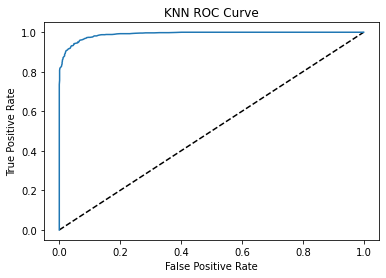

In [119]:
predictions_prob = pipeline.predict_proba(X_test)[:,1]
print(f'ROC-AUC Score: {roc_auc_score(y_test, predictions_prob)}')
fpr, tpr, thresholds= roc_curve(y_test, predictions_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistric Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()

In [120]:
cv_scores = cross_val_score(pipeline, X_train,y_train,cv=5,scoring='accuracy')
cv_scores

array([0.94151671, 0.93504823, 0.9414791 , 0.93954984, 0.94533762])

In [121]:
cv_scores.mean()

0.9405863001016705

In [122]:
pipeline['rf'].feature_importances_

array([0.37185776, 0.0132425 , 0.01099615, 0.16828343, 0.14544134,
       0.02990777, 0.02206055, 0.02722181, 0.00042997, 0.03461749,
       0.03731422, 0.02437147, 0.07312128, 0.04113425])

In [123]:
importances_rf = pd.Series(pipeline['rf'].feature_importances_,index=X_train.columns)
importances_rf

age                            0.371858
hypertension                   0.013243
heart_disease                  0.010996
avg_glucose_level              0.168283
bmi                            0.145441
gender_Male                    0.029908
ever_married_Yes               0.022061
Residence_type_Urban           0.027222
work_type_Never_worked         0.000430
work_type_Private              0.034617
work_type_Self-employed        0.037314
work_type_children             0.024371
smoking_status_never smoked    0.073121
smoking_status_smokes          0.041134
dtype: float64

In [124]:
sorted_features = importances_rf.sort_values()
sorted_features

work_type_Never_worked         0.000430
heart_disease                  0.010996
hypertension                   0.013243
ever_married_Yes               0.022061
work_type_children             0.024371
Residence_type_Urban           0.027222
gender_Male                    0.029908
work_type_Private              0.034617
work_type_Self-employed        0.037314
smoking_status_smokes          0.041134
smoking_status_never smoked    0.073121
bmi                            0.145441
avg_glucose_level              0.168283
age                            0.371858
dtype: float64

<AxesSubplot:>

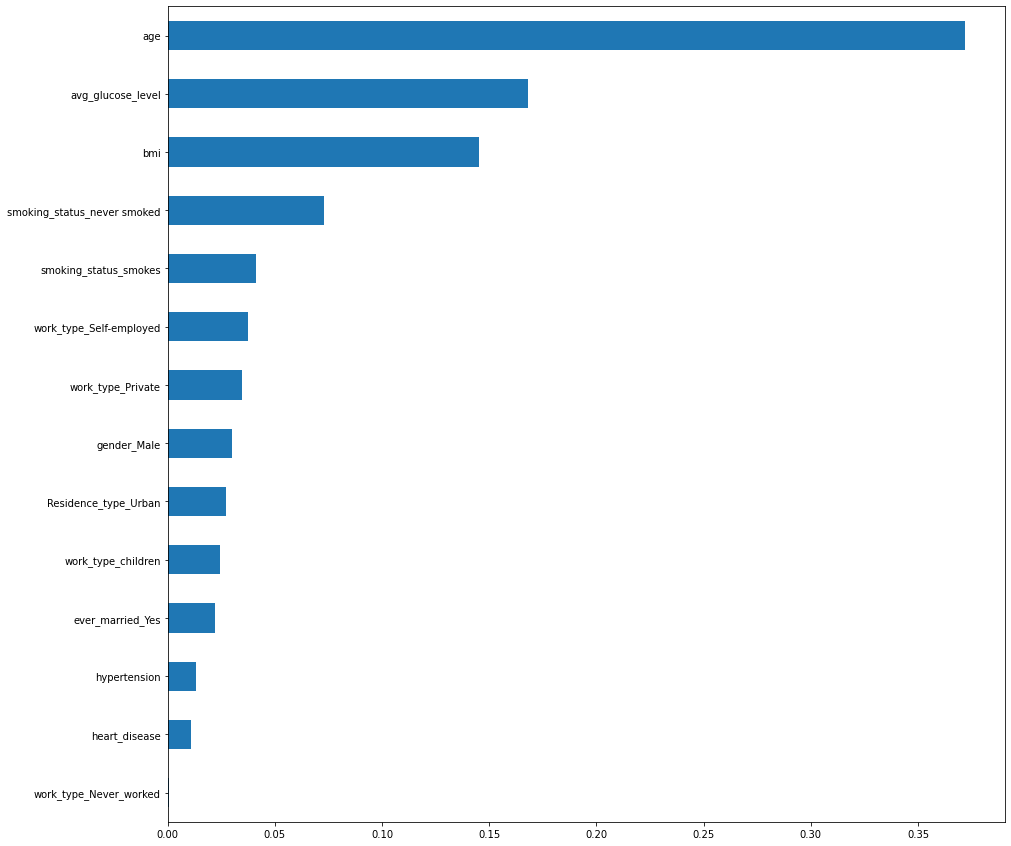

In [125]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
sorted_features.plot(kind='barh')

#### Using GridSearch to find the optimal parameters for the RandomForest

In [126]:
start_time = time.time()
steps = [
            ('rf', RandomForestClassifier(n_estimators=100))
        ]
pipeline = Pipeline(steps)

parameters = {
    'rf__max_features':['auto','sqrt','log2',None]
}
cv = GridSearchCV(pipeline, param_grid=parameters,cv=5)

#fitting the model
cv.fit(X_train,y_train)
predictions = cv.predict(X_test)
end_time = time.time()
print(f'Training Time: {(end_time - start_time):.2f} seconds')

#Printing Best Parameters
print(f'Best Parameters: {cv.best_params_}')

#Printing Best Score
print(f'Best Score: {cv.best_score_}')

Training Time: 13.89 seconds
Best Parameters: {'rf__max_features': 'auto'}
Best Score: 0.9414869522809743


### Naive Bayes

In [127]:
from sklearn.naive_bayes import BernoulliNB

start_time = time.time()
steps = [
            ('bnb', BernoulliNB())
        ]
pipeline = Pipeline(steps)

#fitting the model
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
end_time = time.time()
print(f'Training Time: {(end_time - start_time):.2f} seconds')

#Checking Accuracy of the model
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

print(f'Confusion Matrix:\n {confusion_matrix}')
print(f'Accuracy: {metrics.accuracy_score(y_test, predictions)}')
print(f'Precision: {metrics.precision_score(y_test,predictions)}')
print(f'Recall: {metrics.recall_score(y_test,predictions)}')
print(f'F1 Score: {metrics.f1_score(y_test,predictions)}')


Training Time: 0.01 seconds
Confusion Matrix:
 [[691 285]
 [211 757]]
Accuracy: 0.7448559670781894
Precision: 0.7264875239923224
Recall: 0.7820247933884298
F1 Score: 0.7532338308457711


ROC-AUC Score: 0.8341460549044845


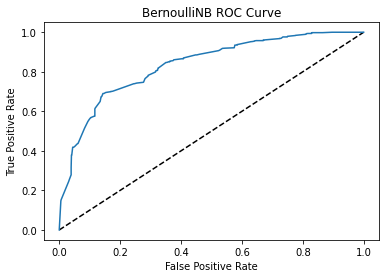

In [128]:
predictions_prob = pipeline.predict_proba(X_test)[:,1]
print(f'ROC-AUC Score: {roc_auc_score(y_test, predictions_prob)}')
fpr, tpr, thresholds= roc_curve(y_test, predictions_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Bernoulli Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BernoulliNB ROC Curve')
plt.show()

In [129]:
cv_scores = cross_val_score(pipeline, X_train,y_train,cv=5,scoring='accuracy')
cv_scores

array([0.73393316, 0.73504823, 0.7266881 , 0.74598071, 0.73826367])

In [130]:
cv_scores.mean()

0.7359827738698451

#### Using GridSearch to find the optimal parameters for the BernoulliNB

In [131]:
start_time = time.time()
steps = [
            ('rf', BernoulliNB())
        ]
pipeline = Pipeline(steps)

parameters = {
            'rf__alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }
cv = GridSearchCV(pipeline, param_grid=parameters,cv=5)

#fitting the model
cv.fit(X_train,y_train)
predictions = cv.predict(X_test)
end_time = time.time()
print(f'Training Time: {(end_time - start_time):.2f} seconds')

#Printing Best Parameters
print(f'Best Parameters: {cv.best_params_}')

#Printing Best Score
print(f'Best Score: {cv.best_score_}')

Training Time: 0.15 seconds
Best Parameters: {'rf__alpha': 0.01}
Best Score: 0.7375251903222872


### Voting Classifier

In [132]:
from sklearn.ensemble import VotingClassifier

start_time = time.time()
classifiers = [
    ('logreg', LogisticRegression(solver='lbfgs')),
    ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=2, weights='uniform')),
    ('dt',DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features=None, splitter='best'))
]
vc = VotingClassifier(estimators=classifiers)

#fitting the model
vc.fit(X_train,y_train)
predictions = vc.predict(X_test)
end_time = time.time()
print(f'Training Time: {(end_time - start_time):.2f} seconds')

#Checking Accuracy of the model
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

print(f'Confusion Matrix:\n {confusion_matrix}')
print(f'Accuracy: {metrics.accuracy_score(y_test, predictions)}')
print(f'Precision: {metrics.precision_score(y_test,predictions)}')
print(f'Recall: {metrics.recall_score(y_test,predictions)}')
print(f'F1 Score: {metrics.f1_score(y_test,predictions)}')



Training Time: 0.28 seconds
Confusion Matrix:
 [[888  88]
 [ 52 916]]
Accuracy: 0.9279835390946503
Precision: 0.9123505976095617
Recall: 0.9462809917355371
F1 Score: 0.9290060851926977


C:\Users\Predator\Envs\kn_ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
cv_scores = cross_val_score(pipeline,X_test,y_test)

## Boosting - AdaBoost

In [134]:
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()
adaboost = AdaBoostClassifier(DecisionTreeClassifier())

#fitting the model
adaboost.fit(X_train,y_train)
predictions = adaboost.predict(X_test)
end_time = time.time()
print(f'Training Time: {(end_time - start_time):.2f} seconds')

#Checking Accuracy of the model
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

print(f'Confusion Matrix:\n {confusion_matrix}')
print(f'Accuracy: {metrics.accuracy_score(y_test, predictions)}')
print(f'Precision: {metrics.precision_score(y_test,predictions)}')
print(f'Recall: {metrics.recall_score(y_test,predictions)}')
print(f'F1 Score: {metrics.f1_score(y_test,predictions)}')

Training Time: 0.03 seconds
Confusion Matrix:
 [[880  96]
 [ 83 885]]
Accuracy: 0.9079218106995884
Precision: 0.9021406727828746
Recall: 0.9142561983471075
F1 Score: 0.9081580297588506


In [135]:
cv_scores = cross_val_score(adaboost,X_train,y_train,cv=5)
cv_scores

array([0.89524422, 0.90353698, 0.89967846, 0.89903537, 0.92090032])

In [136]:
cv_scores.mean()

0.9036790682680464

In [137]:
cv_scores = cross_val_score(adaboost,X_test,y_test,cv=5)
cv_scores

array([0.84832905, 0.84061697, 0.82005141, 0.85347044, 0.84020619])

### Gradient Boosting

Gradient boosting algorithm is one of the most powerful algorithms in the field of machine learning. As we know that the errors in machine learning algorithms are broadly classified into two categories i.e. Bias Error and Variance Error. As gradient boosting is one of the boosting algorithms it is used to minimize bias error of the model.

**Unlike, Adaboosting algorithm, the base estimator in the gradient boosting algorithm cannot be mentioned by us. The base estimator for the Gradient Boost algorithm is fixed and i.e. Decision Stump.** Like, AdaBoost, we can tune the n_estimator of the gradient boosting algorithm. However, if we do not mention the value of n_estimator, the default value of n_estimator for this algorithm is 100.

Gradient boosting algorithm can be used for predicting not only continuous target variable (as a Regressor) but also categorical target variable (as a Classifier). When it is used as a regressor, the cost function is Mean Square Error (MSE) and when it is used as a classifier then the cost function is Log loss.

 

In [138]:
from sklearn.ensemble import GradientBoostingClassifier

start_time = time.time()

parameters = {
    'loss': ['deviance','exponential'],
}

#fitting the model
gdboost = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=parameters,cv=5)
gdboost.fit(X_train,y_train)

#Making Predictions
predictions = gdboost.predict(X_test)
end_time = time.time()
print(f'Training Time: {(end_time - start_time):.2f} seconds')

#Checking Accuracy of the model
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

print(f'Confusion Matrix:\n {confusion_matrix}')
print(f'Accuracy: {metrics.accuracy_score(y_test, predictions)}')
print(f'Precision: {metrics.precision_score(y_test,predictions)}')
print(f'Recall: {metrics.recall_score(y_test,predictions)}')
print(f'F1 Score: {metrics.f1_score(y_test,predictions)}')

Training Time: 6.71 seconds
Confusion Matrix:
 [[841 135]
 [ 94 874]]
Accuracy: 0.882201646090535
Precision: 0.8662041625371655
Recall: 0.9028925619834711
F1 Score: 0.8841679312089024


In [139]:
gdboost.best_params_

{'loss': 'deviance'}

In [140]:
gdboost.best_score_

0.884773555741079

### XGboost

In [141]:
from xgboost import XGBClassifier

start_time = time.time()

xgboost = XGBClassifier(objective="reg:logistic", random_state=42,use_label_encoder = False)

#fitting the model
xgboost.fit(X_train,y_train)
predictions = xgboost.predict(X_test)
end_time = time.time()
print(f'Training Time: {(end_time - start_time):.2f} seconds')

#Checking Acuracy of the model
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

print(f'Confusion Matrix:\n {confusion_matrix}')
print(f'Accuracy: {metrics.accuracy_score(y_test, predictions)}')
print(f'Precision: {metrics.precision_score(y_test,predictions)}')
print(f'Recall: {metrics.recall_score(y_test,predictions)}')
print(f'F1 Score: {metrics.f1_score(y_test,predictions)}')

Training Time: 0.92 seconds
Confusion Matrix:
 [[938  38]
 [ 38 930]]
Accuracy: 0.9609053497942387
Precision: 0.9607438016528925
Recall: 0.9607438016528925
F1 Score: 0.9607438016528925


ROC-AUC Score: 0.9941361265411192


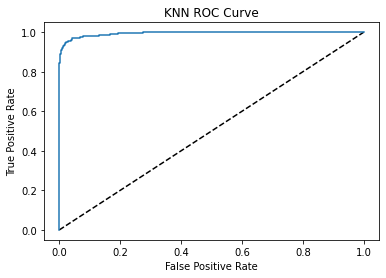

In [142]:
predictions_prob = xgboost.predict_proba(X_test)[:,1]
print(f'ROC-AUC Score: {roc_auc_score(y_test, predictions_prob)}')
fpr, tpr, thresholds= roc_curve(y_test, predictions_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistric Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()

In [143]:
cv_scores = cross_val_score(xgboost, X_train,y_train,cv=5,scoring='accuracy')
cv_scores

array([0.94794344, 0.95562701, 0.94983923, 0.95498392, 0.95434084])

In [144]:
cv_scores.mean()

0.9525468883029286

#### Using GridSearch to find the optimal parameters for the XGboost

In [145]:
xgboost_model = XGBClassifier(objective = "reg:logistic",random_state=42,use_label_encoder = False)

params = {
            "learning_rate"    : [0.20, 0.25, 0.30 ] ,
            "max_depth"        : [ 8, 10, 12, 14],
            "min_child_weight" : [ 1, 3, 5],
            "gamma"            : [ 0.1, 0.2 , 0.3],
            "colsample_bytree" : [ 0.4, 0.5 , 0.7 ]
        }

cv = GridSearchCV(xgboost_model, 
                    param_grid = params, 
                    scoring = 'accuracy', 
                    n_jobs = -1, 
                    cv = 10,)

result=cv.fit(X_train,y_train)
# Dictionary of best parameters
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9587205089775784
Best Hyperparameters: {'colsample_bytree': 0.4, 'gamma': 0.3, 'learning_rate': 0.25, 'max_depth': 14, 'min_child_weight': 1}


In [146]:
from xgboost import XGBClassifier

start_time = time.time()

xgboost_tuned = XGBClassifier(objective="reg:logistic",colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=1)

#fitting the model
xgboost.fit(X_train,y_train)
predictions = xgboost.predict(X_test)
end_time = time.time()
print(f'Training Time: {(end_time - start_time):.2f} seconds')

#Checking Acuracy of the model
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

print(f'Confusion Matrix:\n {confusion_matrix}')
print(f'Accuracy: {metrics.accuracy_score(y_test, predictions)}')
print(f'Precision: {metrics.precision_score(y_test,predictions)}')
print(f'Recall: {metrics.recall_score(y_test,predictions)}')
print(f'F1 Score: {metrics.f1_score(y_test,predictions)}')

Training Time: 0.68 seconds
Confusion Matrix:
 [[938  38]
 [ 38 930]]
Accuracy: 0.9609053497942387
Precision: 0.9607438016528925
Recall: 0.9607438016528925
F1 Score: 0.9607438016528925


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 14400x432 with 0 Axes>

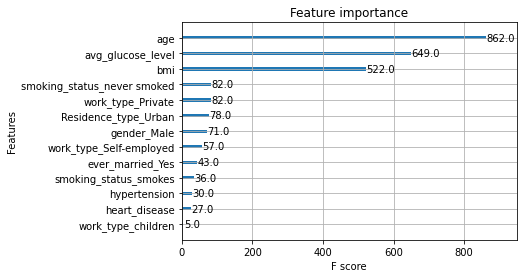

In [147]:
from xgboost import plot_importance
plt.figure(figsize=(200,6))
plot_importance(xgboost)